**STEP 1 - Load the MC3 mutation file and verify it**

In [1]:
import pandas as pd

maf_path = "data_raw/pancan_mc3/mc3.v0.2.8.PUBLIC.maf.gz"

maf = pd.read_csv(
    maf_path,
    sep="\t",
    comment="#",
    low_memory=False
)

print("MAF loaded successfully")
print("Shape:", maf.shape)


MAF loaded successfully
Shape: (3600963, 114)


In [2]:
maf.columns.tolist()


['Hugo_Symbol',
 'Entrez_Gene_Id',
 'Center',
 'NCBI_Build',
 'Chromosome',
 'Start_Position',
 'End_Position',
 'Strand',
 'Variant_Classification',
 'Variant_Type',
 'Reference_Allele',
 'Tumor_Seq_Allele1',
 'Tumor_Seq_Allele2',
 'dbSNP_RS',
 'dbSNP_Val_Status',
 'Tumor_Sample_Barcode',
 'Matched_Norm_Sample_Barcode',
 'Match_Norm_Seq_Allele1',
 'Match_Norm_Seq_Allele2',
 'Tumor_Validation_Allele1',
 'Tumor_Validation_Allele2',
 'Match_Norm_Validation_Allele1',
 'Match_Norm_Validation_Allele2',
 'Verification_Status',
 'Validation_Status',
 'Mutation_Status',
 'Sequencing_Phase',
 'Sequence_Source',
 'Validation_Method',
 'Score',
 'BAM_File',
 'Sequencer',
 'Tumor_Sample_UUID',
 'Matched_Norm_Sample_UUID',
 'HGVSc',
 'HGVSp',
 'HGVSp_Short',
 'Transcript_ID',
 'Exon_Number',
 't_depth',
 't_ref_count',
 't_alt_count',
 'n_depth',
 'n_ref_count',
 'n_alt_count',
 'all_effects',
 'Allele',
 'Gene',
 'Feature',
 'Feature_type',
 'Consequence',
 'cDNA_position',
 'CDS_position',
 'Prot

In [3]:
maf.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,ExAC_AF_NFE,ExAC_AF_OTH,ExAC_AF_SAS,GENE_PHENO,FILTER,COSMIC,CENTERS,CONTEXT,DBVS,NCALLERS
0,TACC2,0,.,GRCh37,10,123810032,123810032,+,Missense_Mutation,SNP,...,.,.,.,.,PASS,SITE|p.T38M|c.113C>T|3,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,GGACACGCCCG,by1000G,5
1,JAKMIP3,0,.,GRCh37,10,133967449,133967449,+,Silent,SNP,...,.,.,.,.,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CTGGACGAGGA,byFrequency,5
2,PANX3,0,.,GRCh37,11,124489539,124489539,+,Missense_Mutation,SNP,...,.,.,.,.,PASS,SITE|p.R296Q|c.887G>A|3,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,ATGTCGGTGGG,.,5
3,SPI1,0,.,GRCh37,11,47380512,47380512,+,Missense_Mutation,SNP,...,.,.,.,.,PASS,NONE,RADIA|MUSE,GGCTGGGGACA,.,2
4,NAALAD2,0,.,GRCh37,11,89868837,89868837,+,Missense_Mutation,SNP,...,.,.,.,.,PASS,SITE|p.R65C|c.193C>T|4,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,TTCTTCGGTAA,.,5


In [4]:
maf["Variant_Classification"].value_counts().head(10)

Variant_Classification
Missense_Mutation    1921979
Silent                782687
3'UTR                 282636
Nonsense_Mutation     157232
Intron                108104
Frame_Shift_Del        87013
5'UTR                  81323
Splice_Site            50617
RNA                    49540
Frame_Shift_Ins        27128
Name: count, dtype: int64

**STEP 2 - Filter to biologically meaningful (non-synonymous) somatic mutations**

In [8]:
NON_SYNONYMOUS = [
    "Missense_Mutation",
    "Nonsense_Mutation",
    "Frame_Shift_Del",
    "Frame_Shift_Ins",
    "Splice_Site",
    "In_Frame_Del",
    "In_Frame_Ins",
    "Translation_Start_Site"
]

In [9]:
non_syn = maf[
    maf["Variant_Classification"].isin(NON_SYNONYMOUS)
].copy()

print("Filtered non-synonymous mutations")
print("Shape:", non_syn.shape)


Filtered non-synonymous mutations
Shape: (2257845, 114)


In [10]:
non_syn["Variant_Classification"].value_counts()

Variant_Classification
Missense_Mutation         1921979
Nonsense_Mutation          157232
Frame_Shift_Del             87013
Splice_Site                 50617
Frame_Shift_Ins             27128
In_Frame_Del                10254
Translation_Start_Site       2723
In_Frame_Ins                  899
Name: count, dtype: int64

In [11]:
cols_keep = [
    "Hugo_Symbol",
    "Tumor_Sample_Barcode",
    "Variant_Classification",
    "Variant_Type"
]

non_syn = non_syn[cols_keep]

non_syn.head()

,Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type
0,TACC2,TCGA-02-0003-01A-01D-1490-08,Missense_Mutation,SNP
2,PANX3,TCGA-02-0003-01A-01D-1490-08,Missense_Mutation,SNP
3,SPI1,TCGA-02-0003-01A-01D-1490-08,Missense_Mutation,SNP
4,NAALAD2,TCGA-02-0003-01A-01D-1490-08,Missense_Mutation,SNP
6,MTERFD3,TCGA-02-0003-01A-01D-1490-08,Missense_Mutation,SNP


In [12]:
non_syn.to_parquet(
    "data_processed/mutations_filtered.parquet",
    index=False
)

print("Saved: data_processed/mutations_filtered.parquet")


Saved: data_processed/mutations_filtered.parquet


**STEP 3 - Merge mutations with clinical data & assign cancer types**

In [13]:
import pandas as pd

# Load filtered mutations
mut = pd.read_parquet("data_processed/mutations_filtered.parquet")

# Load cleaned clinical data
cdr = pd.read_csv(
    "data_processed/clinical_cdr_cleaned.tsv",
    sep="\t"
)

print("Mutations shape:", mut.shape)
print("Clinical shape:", cdr.shape)


Mutations shape: (2257845, 4)
Clinical shape: (11160, 33)


In [14]:
mut["bcr_patient_barcode"] = mut["Tumor_Sample_Barcode"].str[:12]

mut[["Tumor_Sample_Barcode", "bcr_patient_barcode"]].head()


,Tumor_Sample_Barcode,bcr_patient_barcode
0,TCGA-02-0003-01A-01D-1490-08,TCGA-02-0003
1,TCGA-02-0003-01A-01D-1490-08,TCGA-02-0003
2,TCGA-02-0003-01A-01D-1490-08,TCGA-02-0003
3,TCGA-02-0003-01A-01D-1490-08,TCGA-02-0003
4,TCGA-02-0003-01A-01D-1490-08,TCGA-02-0003


In [15]:
mut_clin = mut.merge(
    cdr[["bcr_patient_barcode", "type"]],
    on="bcr_patient_barcode",
    how="inner"
)

print("Merged shape:", mut_clin.shape)

Merged shape: (2242923, 6)


In [16]:
mut_clin["type"].value_counts().head(10)

type
UCEC    550521
SKCM    345652
COAD    178307
STAD    165671
LUAD    155070
LUSC    141097
BLCA    101943
BRCA     88413
HNSC     83036
CESC     57049
Name: count, dtype: int64

In [17]:
mut_clin["type"].isna().sum()

np.int64(0)

In [18]:
mut_clin.to_parquet(
    "data_processed/mutations_with_cancer_type.parquet",
    index=False
)

print("Saved: data_processed/mutations_with_cancer_type.parquet")


Saved: data_processed/mutations_with_cancer_type.parquet


**STEP 4 - Restrict the dataset to the 6 selected cancer types**

Selected cancer types:

BRCA  – Breast invasive carcinoma
LUAD  – Lung adenocarcinoma
LUSC  – Lung squamous cell carcinoma
COAD  – Colon adenocarcinoma
STAD  – Stomach adenocarcinoma
PRAD  – Prostate adenocarcinoma


In [20]:
SELECTED_CANCERS = [
    "BRCA",
    "LUAD",
    "LUSC",
    "COAD",
    "STAD",
    "PRAD"
]


In [21]:
mut_6 = mut_clin[
    mut_clin["type"].isin(SELECTED_CANCERS)
].copy()

print("Filtered shape:", mut_6.shape)

Filtered shape: (751529, 6)


In [22]:
mut_6["type"].value_counts()

type
COAD    178307
STAD    165671
LUAD    155070
LUSC    141097
BRCA     88413
PRAD     22971
Name: count, dtype: int64

In [23]:
mut_6.to_parquet(
    "data_processed/mutations_6_cancer_types.parquet",
    index=False
)

print("Saved: data_processed/mutations_6_cancer_types.parquet")

Saved: data_processed/mutations_6_cancer_types.parquet


**STEP 5 - Aggregate mutations at the sample (tumor) level**

In [24]:
import pandas as pd

mut_6 = pd.read_parquet(
    "data_processed/mutations_6_cancer_types.parquet"
)

print(mut_6.shape)


(751529, 6)


**Define aggregation features:**

We will compute per-sample mutation burden features:

1-Total non-synonymous mutations

2-Count of each mutation class

3-Cancer type label (constant per sample)

These features are:
- used in many papers
- easy to interpret
- strong baseline

In [25]:
# Total mutations per sample
total_mut = (
    mut_6
    .groupby("Tumor_Sample_Barcode")
    .size()
    .rename("total_mutations")
)

# Mutation type counts per sample
mut_class_counts = (
    mut_6
    .groupby(["Tumor_Sample_Barcode", "Variant_Classification"])
    .size()
    .unstack(fill_value=0)
)

# Cancer type per sample
sample_labels = (
    mut_6
    .groupby("Tumor_Sample_Barcode")["type"]
    .first()
)

# Combine into one table
X_basic = pd.concat(
    [total_mut, mut_class_counts],
    axis=1
)

print("Feature matrix shape:", X_basic.shape)
print("Label vector shape:", sample_labels.shape)


Feature matrix shape: (3366, 9)
Label vector shape: (3366,)


In [26]:
X_basic.head()

,total_mutations,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,Translation_Start_Site
Tumor_Sample_Barcode,,,,,,,,,
TCGA-05-4244-01A-01D-1105-08,186,3,3,1,0,163,10,6,0
TCGA-05-4249-01A-01D-1105-08,298,7,3,1,0,253,26,8,0
TCGA-05-4250-01A-01D-1105-08,310,10,3,2,0,270,17,8,0
TCGA-05-4382-01A-01D-1931-08,1533,28,10,0,0,1328,113,53,1
TCGA-05-4384-01A-01D-1753-08,116,4,0,0,0,100,9,3,0


In [27]:
sample_labels.value_counts()

type
BRCA    1026
LUAD     516
PRAD     495
LUSC     485
STAD     438
COAD     406
Name: count, dtype: int64

In [28]:
X_basic.to_parquet(
    "data_processed/X_basic_features.parquet"
)

sample_labels.to_csv(
    "data_processed/y_cancer_labels.csv"
)

print("Saved:")
print("- data_processed/X_basic_features.parquet")
print("- data_processed/y_cancer_labels.csv")


Saved:
- data_processed/X_basic_features.parquet
- data_processed/y_cancer_labels.csv


**STEP 6 - Exploratory Data Analysis (EDA)**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load features
X = pd.read_parquet("data_processed/X_basic_features.parquet")

# Load labels
y = pd.read_csv("data_processed/y_cancer_labels.csv", index_col=0)

# Convert single-column DataFrame to Series
y = y.iloc[:, 0]

# Merge for EDA
eda_df = X.copy()
eda_df["cancer_type"] = y

eda_df.head()


,total_mutations,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,Translation_Start_Site,cancer_type
Tumor_Sample_Barcode,,,,,,,,,,
TCGA-05-4244-01A-01D-1105-08,186,3,3,1,0,163,10,6,0,LUAD
TCGA-05-4249-01A-01D-1105-08,298,7,3,1,0,253,26,8,0,LUAD
TCGA-05-4250-01A-01D-1105-08,310,10,3,2,0,270,17,8,0,LUAD
TCGA-05-4382-01A-01D-1931-08,1533,28,10,0,0,1328,113,53,1,LUAD
TCGA-05-4384-01A-01D-1753-08,116,4,0,0,0,100,9,3,0,LUAD


In [32]:
print(type(y))
print(y.value_counts())


<class 'pandas.core.series.Series'>
type
BRCA    1026
LUAD     516
PRAD     495
LUSC     485
STAD     438
COAD     406
Name: count, dtype: int64


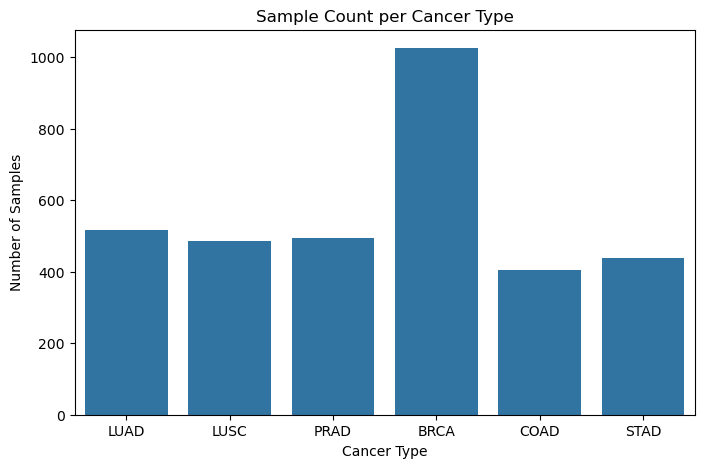

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x="cancer_type", data=eda_df)
plt.title("Sample Count per Cancer Type")
plt.xlabel("Cancer Type")
plt.ylabel("Number of Samples")
plt.show()


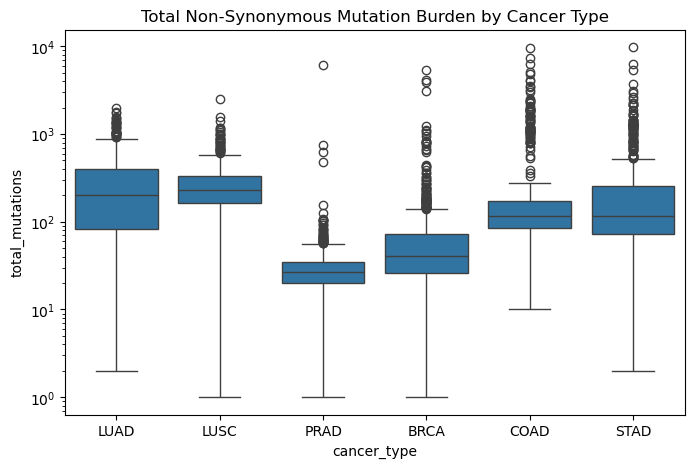

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="cancer_type",
    y="total_mutations",
    data=eda_df
)
plt.yscale("log")
plt.title("Total Non-Synonymous Mutation Burden by Cancer Type")
plt.show()


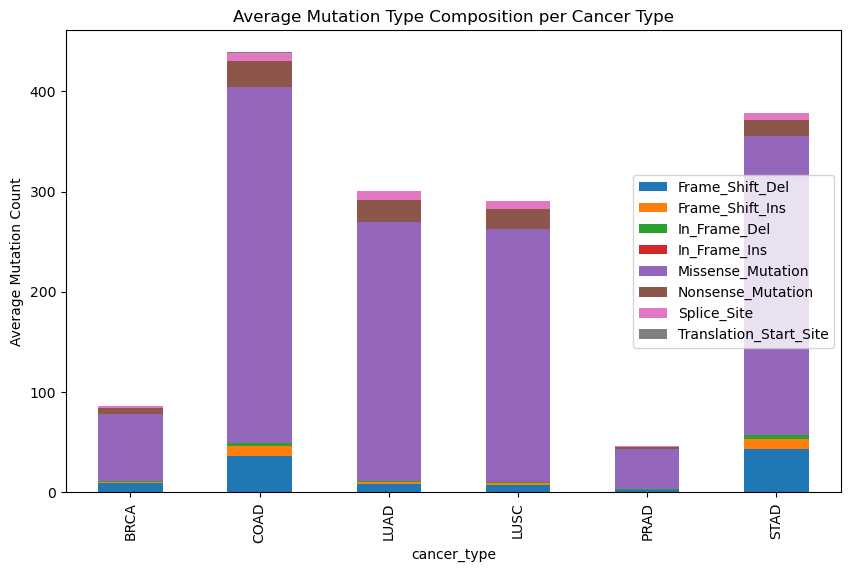

In [35]:
mutation_cols = [
    col for col in X.columns
    if col != "total_mutations"
]

mean_mut = (
    eda_df
    .groupby("cancer_type")[mutation_cols]
    .mean()
)

mean_mut.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

plt.title("Average Mutation Type Composition per Cancer Type")
plt.ylabel("Average Mutation Count")
plt.show()


**STEP 7 - Train a baseline Random Forest classifier**

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load features and labels
X = pd.read_parquet("data_processed/X_basic_features.parquet")
y = pd.read_csv("data_processed/y_cancer_labels.csv", index_col=0).iloc[:, 0]

print(X.shape, y.shape)


(3366, 9) (3366,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (2692, 9)
Test: (674, 9)


In [38]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

print("Random Forest trained")


Random Forest trained


In [39]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        BRCA       0.51      0.60      0.55       206
        COAD       0.34      0.37      0.35        81
        LUAD       0.44      0.27      0.34       103
        LUSC       0.52      0.60      0.56        97
        PRAD       0.47      0.39      0.43        99
        STAD       0.35      0.33      0.34        88

    accuracy                           0.46       674
   macro avg       0.44      0.43      0.43       674
weighted avg       0.45      0.46      0.45       674



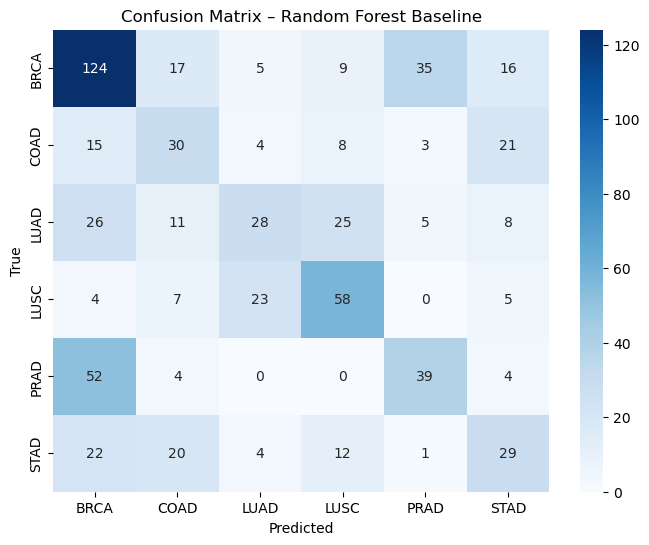

In [40]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=rf.classes_,
    yticklabels=rf.classes_
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Random Forest Baseline")
plt.show()


In [41]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances


total_mutations           0.230543
Missense_Mutation         0.220541
Nonsense_Mutation         0.141828
Frame_Shift_Del           0.120155
Splice_Site               0.101388
Frame_Shift_Ins           0.079742
In_Frame_Del              0.067200
Translation_Start_Site    0.023544
In_Frame_Ins              0.015059
dtype: float64

**STEP 8 - Gene-level mutation features (FOUNDATION STEP)**

In [42]:
import pandas as pd

# Load mutation data (6 cancer types)
mut_6 = pd.read_parquet(
    "data_processed/mutations_6_cancer_types.parquet"
)

# Count unique samples per gene
gene_freq = (
    mut_6
    .groupby("Hugo_Symbol")["Tumor_Sample_Barcode"]
    .nunique()
    .sort_values(ascending=False)
)

gene_freq.head(20)


Hugo_Symbol
TP53      1512
TTN       1299
MUC16      819
CSMD3      671
PIK3CA     646
RYR2       638
LRP1B      605
SYNE1      544
ZFHX4      544
USH2A      535
FLG        473
SPTA1      451
APC        419
CSMD1      402
PCLO       398
FAT3       395
XIRP2      391
OBSCN      388
KRAS       387
RYR3       380
Name: Tumor_Sample_Barcode, dtype: int64

In [53]:
TOP_N_GENES = 50
top_genes = gene_freq.head(TOP_N_GENES).index.tolist()

print("Number of genes:", len(top_genes))
print(top_genes[:50])


Number of genes: 50
['TP53', 'TTN', 'MUC16', 'CSMD3', 'PIK3CA', 'RYR2', 'LRP1B', 'SYNE1', 'ZFHX4', 'USH2A', 'FLG', 'SPTA1', 'APC', 'CSMD1', 'PCLO', 'FAT3', 'XIRP2', 'OBSCN', 'KRAS', 'RYR3', 'KMT2C', 'FAT4', 'PCDH15', 'HMCN1', 'DNAH5', 'KMT2D', 'MUC17', 'RYR1', 'NAV3', 'NEB', 'ABCA13', 'DNAH9', 'DMD', 'LRP2', 'COL11A1', 'GPR98', 'DNAH11', 'APOB', 'ANK2', 'CSMD2', 'PAPPA2', 'AHNAK2', 'PKHD1L1', 'RELN', 'FAM135B', 'CACNA1E', 'DNAH8', 'SYNE2', 'PKHD1', 'MUC5B']


**STEP 9 - Encode gene-level mutation features (binary per sample)**

In [48]:
import pandas as pd

# Load mutation data (6 cancer types)
mut_6 = pd.read_parquet(
    "data_processed/mutations_6_cancer_types.parquet"
)

# Load basic sample-level features and labels
X_basic = pd.read_parquet("data_processed/X_basic_features.parquet")
y = pd.read_csv("data_processed/y_cancer_labels.csv", index_col=0).iloc[:, 0]

# Use the previously selected top genes
top_genes = ['TP53', 'TTN', 'MUC16', 'CSMD3', 'PIK3CA', 'RYR2', 'LRP1B', 'SYNE1', 'ZFHX4', 'USH2A', 'FLG', 'SPTA1', 'APC', 'CSMD1', 'PCLO', 'FAT3', 'XIRP2', 'OBSCN', 'KRAS', 'RYR3', 'KMT2C', 'FAT4', 'PCDH15', 'HMCN1', 'DNAH5', 'KMT2D', 'MUC17', 'RYR1', 'NAV3', 'NEB', 'ABCA13', 'DNAH9', 'DMD', 'LRP2', 'COL11A1', 'GPR98', 'DNAH11', 'APOB', 'ANK2', 'CSMD2', 'PAPPA2', 'AHNAK2', 'PKHD1L1', 'RELN', 'FAM135B', 'CACNA1E', 'DNAH8', 'SYNE2', 'PKHD1', 'MUC5B']



In [54]:
mut_genes = mut_6[
    mut_6["Hugo_Symbol"].isin(top_genes)
].copy()

print("Filtered mutations (top genes):", mut_genes.shape)


Filtered mutations (top genes): (32487, 6)


In [55]:
# Create binary mutation indicator per sample per gene
gene_matrix = (
    mut_genes
    .groupby(["Tumor_Sample_Barcode", "Hugo_Symbol"])
    .size()
    .unstack(fill_value=0)
)

# Convert counts to binary (presence/absence)
gene_matrix = (gene_matrix > 0).astype(int)

print("Gene-level feature matrix shape:", gene_matrix.shape)


Gene-level feature matrix shape: (3005, 50)


In [56]:
# Align with X_basic
gene_matrix = gene_matrix.reindex(
    X_basic.index,
    fill_value=0
)

print("Aligned gene matrix shape:", gene_matrix.shape)


Aligned gene matrix shape: (3366, 50)


In [57]:
X_combined = pd.concat(
    [X_basic, gene_matrix],
    axis=1
)

print("Combined feature matrix shape:", X_combined.shape)


Combined feature matrix shape: (3366, 59)


In [58]:
X_combined.to_parquet(
    "data_processed/X_basic_plus_gene_features.parquet"
)

print("Saved: data_processed/X_basic_plus_gene_features.parquet")


Saved: data_processed/X_basic_plus_gene_features.parquet


**STEP 10 - Retrain Random Forest with gene-level features**

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load combined features
X = pd.read_parquet("data_processed/X_basic_plus_gene_features.parquet")

# Load labels
y = pd.read_csv("data_processed/y_cancer_labels.csv", index_col=0).iloc[:, 0]

print(X.shape, y.shape)

(3366, 59) (3366,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [61]:
rf_gene = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf_gene.fit(X_train, y_train)

print("Random Forest (gene-level) trained")

Random Forest (gene-level) trained


In [62]:
y_pred = rf_gene.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        BRCA       0.59      0.76      0.66       206
        COAD       0.78      0.73      0.75        81
        LUAD       0.71      0.47      0.56       103
        LUSC       0.62      0.71      0.66        97
        PRAD       0.58      0.53      0.55        99
        STAD       0.48      0.35      0.41        88

    accuracy                           0.62       674
   macro avg       0.63      0.59      0.60       674
weighted avg       0.62      0.62      0.61       674



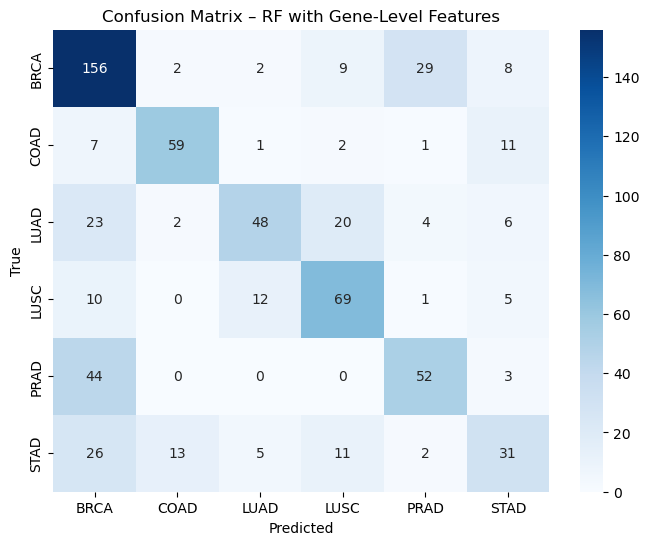

In [63]:
cm = confusion_matrix(y_test, y_pred, labels=rf_gene.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=rf_gene.classes_,
    yticklabels=rf_gene.classes_
)
plt.title("Confusion Matrix – RF with Gene-Level Features")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [64]:
importances = pd.Series(
    rf_gene.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(15)


total_mutations           0.122001
Missense_Mutation         0.115553
Nonsense_Mutation         0.080579
Frame_Shift_Del           0.062984
Splice_Site               0.055911
APC                       0.054549
Frame_Shift_Ins           0.045213
PIK3CA                    0.036142
In_Frame_Del              0.035669
KRAS                      0.030749
TP53                      0.021516
TTN                       0.017004
CSMD3                     0.013055
LRP1B                     0.011776
Translation_Start_Site    0.011349
dtype: float64

**STEP 11 - COSMIC-based gene filtering (FOUNDATION STEP)**

In [65]:
import pandas as pd

cosmic = pd.read_csv(
    "data_raw/reference/cosmic_cancer_gene_census.csv"
)

print(cosmic.shape)
cosmic.head()


(763, 20)


,Gene Symbol,Name,Entrez GeneId,Genome Location,Tier,Hallmark,Chr Band,Somatic,Germline,Tumour Types(Somatic),Tumour Types(Germline),Cancer Syndrome,Tissue Type,Molecular Genetics,Role in Cancer,Mutation Types,Translocation Partner,Other Germline Mut,Other Syndrome,Synonyms
0,A1CF,APOBEC1 complementation factor,29974.0,10:50799421-50885675,2,NaN,10q11.23,yes,NaN,melanoma,NaN,NaN,E,NaN,oncogene,Mis,NaN,NaN,NaN,"ACF,ACF64,ACF65,APOBEC1CF,ASP,CCDS73133.1,ENSG..."
1,ABI1,abl-interactor 1,10006.0,10:26746593-26860935,1,Yes,10p12.1,yes,NaN,AML,NaN,NaN,L,Dom,"TSG, fusion",T,KMT2A,NaN,NaN,"ABI-1,CCDS7150.1,E3B1,ENSG00000136754.17,NM_00..."
2,ABL1,v-abl Abelson murine leukemia viral oncogene h...,25.0,9:130713946-130885683,1,Yes,9q34.12,yes,NaN,"CML, ALL, T-ALL",NaN,NaN,L,Dom,"oncogene, fusion","T, Mis","BCR, ETV6, NUP214",NaN,NaN,"ABL,CCDS35165.1,ENSG00000097007.17,JTK7,NM_007..."
3,ABL2,"c-abl oncogene 2, non-receptor tyrosine kinase",27.0,1:179099327-179229601,1,NaN,1q25.2,yes,NaN,AML,NaN,NaN,L,Dom,"oncogene, fusion",T,ETV6,NaN,NaN,"ABLL,ARG,CCDS30947.1,ENSG00000143322.19,NM_007..."
4,ACKR3,atypical chemokine receptor 3,57007.0,2:236569641-236582358,1,Yes,2q37.3,yes,NaN,lipoma,NaN,NaN,M,Dom,"oncogene, fusion",T,HMGA2,NaN,NaN,"CCDS2516.1,CMKOR1,CXCR7,ENSG00000144476.5,GPR1..."


In [66]:
cosmic.columns.tolist()

['Gene Symbol',
 'Name',
 'Entrez GeneId',
 'Genome Location',
 'Tier',
 'Hallmark',
 'Chr Band',
 'Somatic',
 'Germline',
 'Tumour Types(Somatic)',
 'Tumour Types(Germline)',
 'Cancer Syndrome',
 'Tissue Type',
 'Molecular Genetics',
 'Role in Cancer',
 'Mutation Types',
 'Translocation Partner',
 'Other Germline Mut',
 'Other Syndrome',
 'Synonyms']

In [67]:
cosmic_genes = (
    cosmic["Gene Symbol"]
    .dropna()
    .unique()
    .tolist()
)

print("Number of COSMIC genes:", len(cosmic_genes))
cosmic_genes[:10]


Number of COSMIC genes: 763


['A1CF',
 'ABI1',
 'ABL1',
 'ABL2',
 'ACKR3',
 'ACSL3',
 'ACSL6',
 'ACVR1',
 'ACVR1B',
 'ACVR2A']

In [68]:
top_genes_set = set(top_genes)
cosmic_genes_set = set(cosmic_genes)

top_cosmic_genes = sorted(
    top_genes_set.intersection(cosmic_genes_set)
)

print("COSMIC genes among top 50:", len(top_cosmic_genes))
top_cosmic_genes

COSMIC genes among top 50: 12


['APC',
 'CSMD3',
 'FAM135B',
 'FAT3',
 'FAT4',
 'KMT2C',
 'KMT2D',
 'KRAS',
 'LRP1B',
 'MUC16',
 'PIK3CA',
 'TP53']

**STEP 12 - Rebuild gene-level features using COSMIC-only genes**

In [69]:
cosmic_genes = [
    'APC',
    'CSMD3',
    'FAM135B',
    'FAT3',
    'FAT4',
    'KMT2C',
    'KMT2D',
    'KRAS',
    'LRP1B',
    'MUC16',
    'PIK3CA',
    'TP53'
]

print("Number of COSMIC genes used:", len(cosmic_genes))


Number of COSMIC genes used: 12


In [70]:
mut_cosmic = mut_6[
    mut_6["Hugo_Symbol"].isin(cosmic_genes)
].copy()

print("COSMIC-only mutations shape:", mut_cosmic.shape)


COSMIC-only mutations shape: (9810, 6)


In [71]:
cosmic_matrix = (
    mut_cosmic
    .groupby(["Tumor_Sample_Barcode", "Hugo_Symbol"])
    .size()
    .unstack(fill_value=0)
)

cosmic_matrix = (cosmic_matrix > 0).astype(int)

print("COSMIC gene matrix shape:", cosmic_matrix.shape)


COSMIC gene matrix shape: (2579, 12)


In [72]:
cosmic_matrix = cosmic_matrix.reindex(
    X_basic.index,
    fill_value=0
)

print("Aligned COSMIC matrix shape:", cosmic_matrix.shape)


Aligned COSMIC matrix shape: (3366, 12)


In [73]:
X_cosmic = pd.concat(
    [X_basic, cosmic_matrix],
    axis=1
)

print("Final COSMIC feature matrix shape:", X_cosmic.shape)


Final COSMIC feature matrix shape: (3366, 21)


In [74]:
X_cosmic.to_parquet(
    "data_processed/X_basic_plus_COSMIC_features.parquet"
)

print("Saved: data_processed/X_basic_plus_COSMIC_features.parquet")


Saved: data_processed/X_basic_plus_COSMIC_features.parquet


**STEP 13 - Train Random Forest using COSMIC-only gene features**

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load COSMIC-only features
X = pd.read_parquet("data_processed/X_basic_plus_COSMIC_features.parquet")

# Load labels
y = pd.read_csv("data_processed/y_cancer_labels.csv", index_col=0).iloc[:, 0]

print(X.shape, y.shape)

(3366, 21) (3366,)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [78]:
rf_cosmic = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf_cosmic.fit(X_train, y_train)

print("Random Forest (COSMIC-only) trained")

Random Forest (COSMIC-only) trained


In [79]:
y_pred = rf_cosmic.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        BRCA       0.61      0.72      0.66       206
        COAD       0.78      0.72      0.75        81
        LUAD       0.65      0.46      0.54       103
        LUSC       0.61      0.73      0.66        97
        PRAD       0.60      0.54      0.56        99
        STAD       0.47      0.41      0.44        88

    accuracy                           0.61       674
   macro avg       0.62      0.60      0.60       674
weighted avg       0.62      0.61      0.61       674



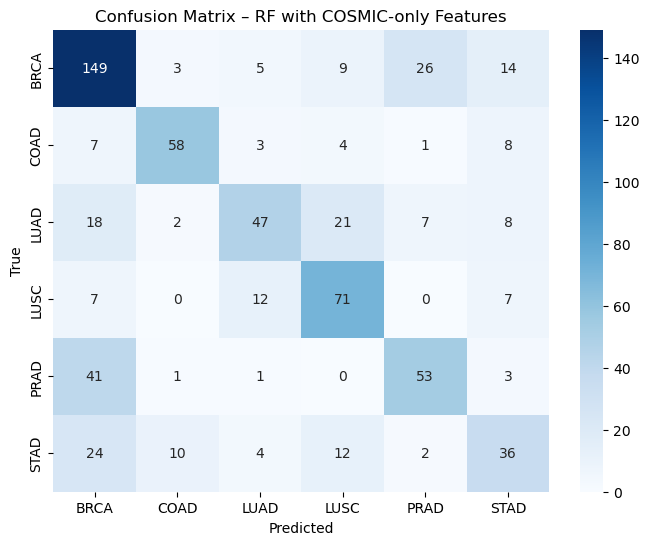

In [80]:
cm = confusion_matrix(y_test, y_pred, labels=rf_cosmic.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=rf_cosmic.classes_,
    yticklabels=rf_cosmic.classes_
)
plt.title("Confusion Matrix – RF with COSMIC-only Features")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [81]:
importances = pd.Series(
    rf_cosmic.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(15)


total_mutations           0.164668
Missense_Mutation         0.160351
Nonsense_Mutation         0.107632
Frame_Shift_Del           0.087021
Splice_Site               0.075486
APC                       0.062121
Frame_Shift_Ins           0.058965
In_Frame_Del              0.049978
PIK3CA                    0.041603
KRAS                      0.037466
TP53                      0.026541
Translation_Start_Site    0.017094
CSMD3                     0.015963
LRP1B                     0.015616
MUC16                     0.014918
dtype: float64

**STEP 14 - Class-Weighted Random Forest (Performance & Fairness Boost)**

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load COSMIC-only features
X = pd.read_parquet("data_processed/X_basic_plus_COSMIC_features.parquet")

# Load labels
y = pd.read_csv("data_processed/y_cancer_labels.csv", index_col=0).iloc[:, 0]

print(X.shape, y.shape)

(3366, 21) (3366,)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [90]:
rf_weighted = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

rf_weighted.fit(X_train, y_train)

print("Class-weighted Random Forest trained")

Class-weighted Random Forest trained


In [91]:
y_pred = rf_weighted.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        BRCA       0.60      0.74      0.66       206
        COAD       0.74      0.72      0.73        81
        LUAD       0.64      0.45      0.53       103
        LUSC       0.61      0.71      0.65        97
        PRAD       0.60      0.51      0.55        99
        STAD       0.43      0.36      0.40        88

    accuracy                           0.60       674
   macro avg       0.60      0.58      0.59       674
weighted avg       0.60      0.60      0.60       674



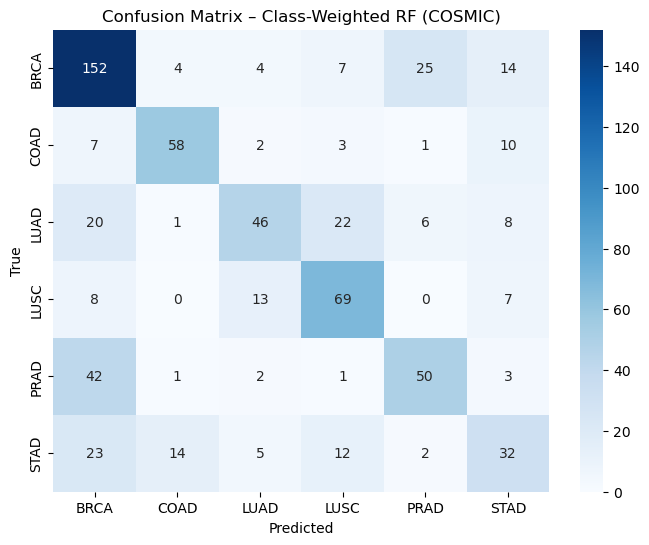

In [92]:
cm = confusion_matrix(y_test, y_pred, labels=rf_weighted.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=rf_weighted.classes_,
    yticklabels=rf_weighted.classes_
)
plt.title("Confusion Matrix – Class-Weighted RF (COSMIC)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [93]:
importances = pd.Series(
    rf_weighted.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(12)

total_mutations           0.163298
Missense_Mutation         0.158620
Nonsense_Mutation         0.105038
Frame_Shift_Del           0.084653
Splice_Site               0.076579
APC                       0.075246
Frame_Shift_Ins           0.059839
In_Frame_Del              0.050268
KRAS                      0.038257
PIK3CA                    0.037871
TP53                      0.026816
Translation_Start_Site    0.016852
dtype: float64

**STEP 15 - XGBoost baseline (COSMIC features)**

In [96]:
import xgboost as xgb
print("xgboost version:", xgb.__version__)

xgboost version: 3.1.2


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

X = pd.read_parquet("data_processed/X_basic_plus_COSMIC_features.parquet")
y = pd.read_csv("data_processed/y_cancer_labels.csv", index_col=0).iloc[:, 0]

# Encode labels as integers for XGBoost
le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Classes:", list(le.classes_))

Train: (2692, 21) Test: (674, 21)
Classes: ['BRCA', 'COAD', 'LUAD', 'LUSC', 'PRAD', 'STAD']


In [98]:
xgb_clf = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=len(le.classes_),
    n_estimators=600,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    min_child_weight=1,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb_clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

print("XGBoost trained")

XGBoost trained


In [99]:
y_pred = xgb_clf.predict(X_test)

print(classification_report(le.inverse_transform(y_test),
                            le.inverse_transform(y_pred)))

              precision    recall  f1-score   support

        BRCA       0.63      0.73      0.68       206
        COAD       0.76      0.67      0.71        81
        LUAD       0.63      0.45      0.52       103
        LUSC       0.64      0.73      0.68        97
        PRAD       0.55      0.55      0.55        99
        STAD       0.45      0.42      0.44        88

    accuracy                           0.61       674
   macro avg       0.61      0.59      0.60       674
weighted avg       0.61      0.61      0.61       674



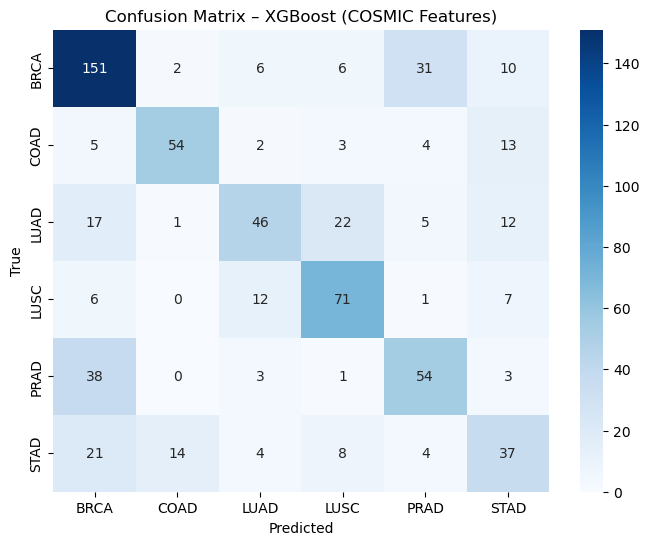

In [100]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.title("Confusion Matrix – XGBoost (COSMIC Features)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [101]:
import numpy as np

imp = pd.Series(xgb_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
imp.head(15)

APC                  0.252151
KRAS                 0.102646
PIK3CA               0.095343
Missense_Mutation    0.049704
total_mutations      0.039705
TP53                 0.038846
KMT2D                0.037248
In_Frame_Del         0.037201
LRP1B                0.035487
Frame_Shift_Del      0.035339
CSMD3                0.033527
Nonsense_Mutation    0.030414
Splice_Site          0.028444
Frame_Shift_Ins      0.028234
FAM135B              0.027815
dtype: float32

**STEP 16 - XGBoost using Top-50 Gene Features (Final Model)**

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Load Top-50 gene features
X = pd.read_parquet("data_processed/X_basic_plus_gene_features.parquet")

# Load labels
y = pd.read_csv("data_processed/y_cancer_labels.csv", index_col=0).iloc[:, 0]

print(X.shape, y.shape)


(3366, 59) (3366,)


In [103]:
le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)

print("Classes:", list(le.classes_))


Classes: ['BRCA', 'COAD', 'LUAD', 'LUSC', 'PRAD', 'STAD']


In [104]:
xgb_top50 = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=len(le.classes_),
    n_estimators=800,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    min_child_weight=1,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb_top50.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

print("XGBoost (Top-50 genes) trained")


XGBoost (Top-50 genes) trained


In [105]:
y_pred = xgb_top50.predict(X_test)

print(classification_report(
    le.inverse_transform(y_test),
    le.inverse_transform(y_pred)
))

              precision    recall  f1-score   support

        BRCA       0.59      0.68      0.64       206
        COAD       0.78      0.70      0.74        81
        LUAD       0.60      0.48      0.53       103
        LUSC       0.66      0.69      0.67        97
        PRAD       0.54      0.54      0.54        99
        STAD       0.50      0.45      0.48        88

    accuracy                           0.60       674
   macro avg       0.61      0.59      0.60       674
weighted avg       0.60      0.60      0.60       674



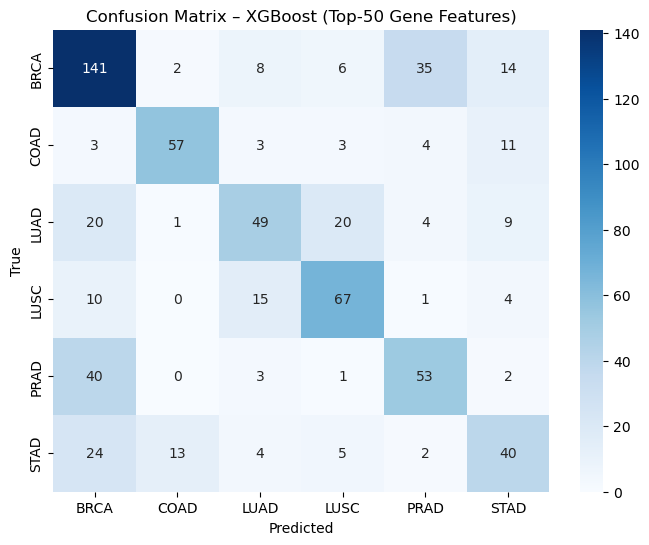

In [106]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.title("Confusion Matrix – XGBoost (Top-50 Gene Features)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [107]:
importances = pd.Series(
    xgb_top50.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(15)

APC                  0.145101
KRAS                 0.055295
PIK3CA               0.051573
Missense_Mutation    0.025303
KMT2D                0.022354
CSMD3                0.019243
In_Frame_Del         0.019166
TP53                 0.019092
LRP1B                0.018757
Frame_Shift_Del      0.018619
SYNE1                0.018248
total_mutations      0.017663
PCDH15               0.016999
HMCN1                0.016198
FAM135B              0.016041
dtype: float32

**STEP 17 (FOUNDATION): SNV Substitution Spectrum per Sample**

In [109]:
import pandas as pd

# Load mutation data used earlier
mut = pd.read_parquet("data_processed/mutations_6_cancer_types.parquet")

print(mut.shape)
mut.head()


(751529, 6)


,Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,Variant_Type,bcr_patient_barcode,type
0,CPN1,TCGA-05-4244-01A-01D-1105-08,Missense_Mutation,SNP,TCGA-05-4244,LUAD
1,NEBL,TCGA-05-4244-01A-01D-1105-08,In_Frame_Del,DEL,TCGA-05-4244,LUAD
2,DIP2C,TCGA-05-4244-01A-01D-1105-08,Splice_Site,SNP,TCGA-05-4244,LUAD
3,HECTD2,TCGA-05-4244-01A-01D-1105-08,Missense_Mutation,SNP,TCGA-05-4244,LUAD
4,ATM,TCGA-05-4244-01A-01D-1105-08,Missense_Mutation,SNP,TCGA-05-4244,LUAD


In [111]:
mut.columns.tolist()


['Hugo_Symbol',
 'Tumor_Sample_Barcode',
 'Variant_Classification',
 'Variant_Type',
 'bcr_patient_barcode',
 'type']

In [113]:
import pandas as pd

maf_path = "data_raw/pancan_mc3/mc3.v0.2.8.PUBLIC.maf.gz"

maf = pd.read_csv(maf_path, sep="\t", low_memory=False, compression="gzip")
print("MAF shape:", maf.shape)

# Keep only the minimal columns needed for signature spectrum + sample/cancer type merge
maf_small = maf[[
    "Tumor_Sample_Barcode",
    "Hugo_Symbol",
    "Variant_Classification",
    "Variant_Type",
    "Reference_Allele",
    "Tumor_Seq_Allele2"
]].copy()

print("maf_small shape:", maf_small.shape)
maf_small.head()


MAF shape: (3600963, 114)
maf_small shape: (3600963, 6)


,Tumor_Sample_Barcode,Hugo_Symbol,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele2
0,TCGA-02-0003-01A-01D-1490-08,TACC2,Missense_Mutation,SNP,C,T
1,TCGA-02-0003-01A-01D-1490-08,JAKMIP3,Silent,SNP,C,T
2,TCGA-02-0003-01A-01D-1490-08,PANX3,Missense_Mutation,SNP,G,A
3,TCGA-02-0003-01A-01D-1490-08,SPI1,Missense_Mutation,SNP,G,T
4,TCGA-02-0003-01A-01D-1490-08,NAALAD2,Missense_Mutation,SNP,C,T


In [114]:
mut_simple = pd.read_parquet("data_processed/mutations_6_cancer_types.parquet")[[
    "Tumor_Sample_Barcode", "type"
]].drop_duplicates()

maf_small = maf_small.merge(mut_simple, on="Tumor_Sample_Barcode", how="inner")

print("After merging type, shape:", maf_small.shape)
maf_small["type"].value_counts()


After merging type, shape: (1126182, 7)


type
COAD    277114
STAD    245353
LUAD    224881
LUSC    209373
BRCA    135030
PRAD     34431
Name: count, dtype: int64

In [116]:
# Keep only SNVs (single nucleotide substitutions)
snv = maf_small[
    (maf_small["Reference_Allele"].isin(["A", "C", "G", "T"])) &
    (maf_small["Tumor_Seq_Allele2"].isin(["A", "C", "G", "T"])) &
    (maf_small["Reference_Allele"] != maf_small["Tumor_Seq_Allele2"])
].copy()

print("SNV shape:", snv.shape)


SNV shape: (1043158, 8)


In [117]:
   complement = {
    "A": "T",
    "T": "A",
    "C": "G",
    "G": "C"
}

def normalize_substitution(ref, alt):
    if ref in ["C", "T"]:
        return f"{ref}>{alt}"
    else:
        return f"{complement[ref]}>{complement[alt]}"

snv["substitution"] = snv.apply(
    lambda x: normalize_substitution(
        x["Reference_Allele"],
        x["Tumor_Seq_Allele2"]
    ),
    axis=1
)

print(snv["substitution"].value_counts())


substitution
C>T    464516
C>A    253858
T>C    124129
C>G     96743
T>A     57518
T>G     46394
Name: count, dtype: int64


In [118]:
sub_counts = (
    snv
    .groupby(["Tumor_Sample_Barcode", "substitution"])
    .size()
    .unstack(fill_value=0)
)

print("Substitution count matrix shape:", sub_counts.shape)
sub_counts.head()


Substitution count matrix shape: (3366, 6)


substitution,C>A,C>G,C>T,T>A,T>C,T>G
Tumor_Sample_Barcode,,,,,,
TCGA-05-4244-01A-01D-1105-08,113,30,67,29,18,5
TCGA-05-4249-01A-01D-1105-08,179,42,91,49,29,9
TCGA-05-4250-01A-01D-1105-08,176,64,113,31,47,10
TCGA-05-4382-01A-01D-1931-08,1161,231,384,203,100,34
TCGA-05-4384-01A-01D-1753-08,68,18,47,15,16,6


In [119]:
sub_frac = sub_counts.div(
    sub_counts.sum(axis=1),
    axis=0
).fillna(0)

print(sub_frac.head())


substitution                       C>A       C>G       C>T       T>A  \
Tumor_Sample_Barcode                                                   
TCGA-05-4244-01A-01D-1105-08  0.431298  0.114504  0.255725  0.110687   
TCGA-05-4249-01A-01D-1105-08  0.448622  0.105263  0.228070  0.122807   
TCGA-05-4250-01A-01D-1105-08  0.399093  0.145125  0.256236  0.070295   
TCGA-05-4382-01A-01D-1931-08  0.549456  0.109323  0.181732  0.096072   
TCGA-05-4384-01A-01D-1753-08  0.400000  0.105882  0.276471  0.088235   

substitution                       T>C       T>G  
Tumor_Sample_Barcode                              
TCGA-05-4244-01A-01D-1105-08  0.068702  0.019084  
TCGA-05-4249-01A-01D-1105-08  0.072682  0.022556  
TCGA-05-4250-01A-01D-1105-08  0.106576  0.022676  
TCGA-05-4382-01A-01D-1931-08  0.047326  0.016091  
TCGA-05-4384-01A-01D-1753-08  0.094118  0.035294  


**STEP 18 - Integrate mutation spectra into cancer-type classification**

In [120]:
# Load best existing feature matrix
X_top50 = pd.read_parquet("data_processed/X_basic_plus_gene_features.parquet")

# Ensure indices match
sub_frac_aligned = sub_frac.reindex(
    X_top50.index,
    fill_value=0
)

print("X_top50 shape:", X_top50.shape)
print("Mutation spectrum shape:", sub_frac_aligned.shape)


X_top50 shape: (3366, 59)
Mutation spectrum shape: (3366, 6)


In [121]:
X_with_spectrum = pd.concat(
    [X_top50, sub_frac_aligned],
    axis=1
)

print("Final feature matrix shape:", X_with_spectrum.shape)


Final feature matrix shape: (3366, 65)


In [122]:
X_with_spectrum.to_parquet(
    "data_processed/X_top50_plus_mutation_spectrum.parquet"
)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load labels
y = pd.read_csv("data_processed/y_cancer_labels.csv", index_col=0).iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(
    X_with_spectrum,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

rf_spectrum = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf_spectrum.fit(X_train, y_train)

y_pred = rf_spectrum.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        BRCA       0.65      0.82      0.72       206
        COAD       0.78      0.72      0.75        81
        LUAD       0.73      0.57      0.64       103
        LUSC       0.82      0.75      0.78        97
        PRAD       0.58      0.51      0.54        99
        STAD       0.71      0.67      0.69        88

    accuracy                           0.69       674
   macro avg       0.71      0.67      0.69       674
weighted avg       0.70      0.69      0.69       674



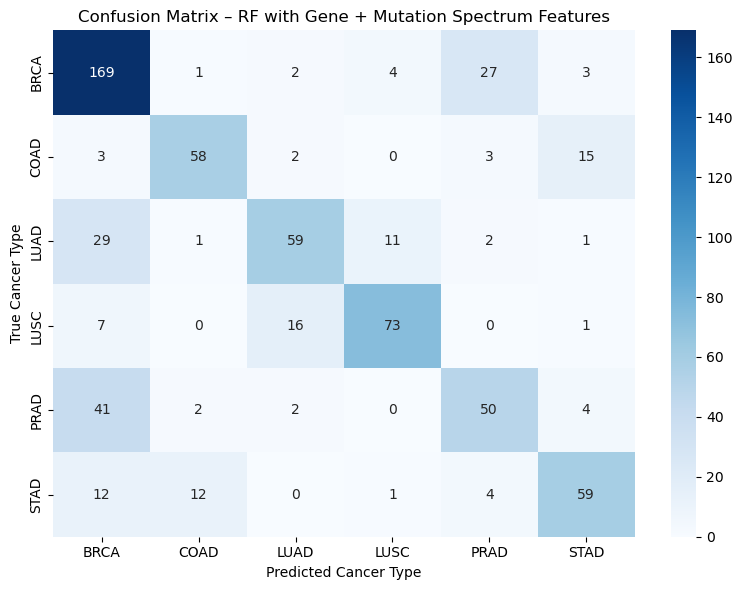

In [124]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_spectrum.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=rf_spectrum.classes_,
    yticklabels=rf_spectrum.classes_
)

plt.xlabel("Predicted Cancer Type")
plt.ylabel("True Cancer Type")
plt.title("Confusion Matrix – RF with Gene + Mutation Spectrum Features")
plt.tight_layout()
plt.show()


In [125]:
import pandas as pd

importances = pd.Series(
    rf_spectrum.feature_importances_,
    index=X_with_spectrum.columns
).sort_values(ascending=False)

# Top 20 features
top20 = importances.head(20)
top20


C>A                  0.090595
total_mutations      0.078853
Missense_Mutation    0.078150
C>T                  0.076279
C>G                  0.075733
T>G                  0.065303
T>C                  0.062334
Nonsense_Mutation    0.048167
T>A                  0.046475
APC                  0.042744
Frame_Shift_Del      0.032276
Splice_Site          0.030313
PIK3CA               0.026309
Frame_Shift_Ins      0.025089
KRAS                 0.023624
In_Frame_Del         0.016668
TP53                 0.013330
TTN                  0.010311
CSMD3                0.007109
SYNE1                0.006391
dtype: float64

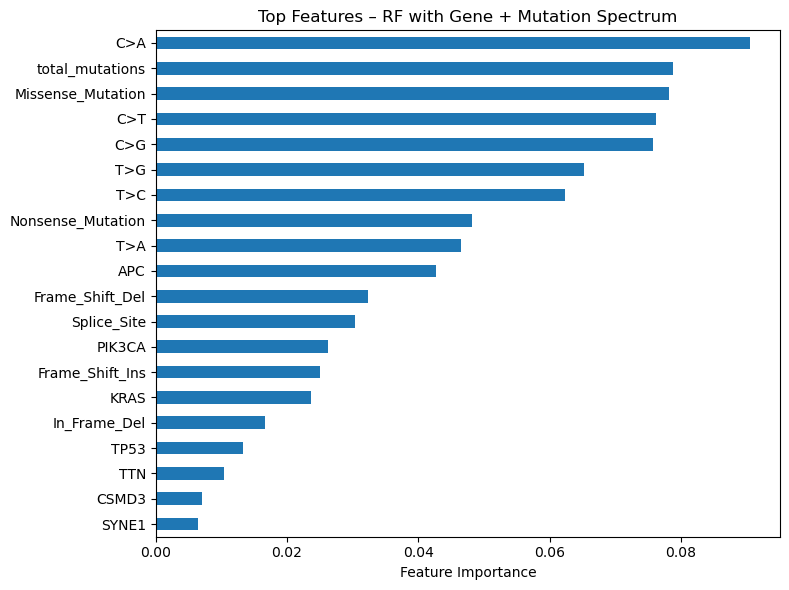

In [189]:
plt.figure(figsize=(8, 6))
top20[::-1].plot(kind="barh")
plt.xlabel("Feature Importance")
plt.title("Top Features – RF with Gene + Mutation Spectrum")
plt.tight_layout()
plt.show()


**STEP 20 - Verify if you can build 96-channel mutation context features**

In [128]:
maf.columns.tolist()


['Hugo_Symbol',
 'Entrez_Gene_Id',
 'Center',
 'NCBI_Build',
 'Chromosome',
 'Start_Position',
 'End_Position',
 'Strand',
 'Variant_Classification',
 'Variant_Type',
 'Reference_Allele',
 'Tumor_Seq_Allele1',
 'Tumor_Seq_Allele2',
 'dbSNP_RS',
 'dbSNP_Val_Status',
 'Tumor_Sample_Barcode',
 'Matched_Norm_Sample_Barcode',
 'Match_Norm_Seq_Allele1',
 'Match_Norm_Seq_Allele2',
 'Tumor_Validation_Allele1',
 'Tumor_Validation_Allele2',
 'Match_Norm_Validation_Allele1',
 'Match_Norm_Validation_Allele2',
 'Verification_Status',
 'Validation_Status',
 'Mutation_Status',
 'Sequencing_Phase',
 'Sequence_Source',
 'Validation_Method',
 'Score',
 'BAM_File',
 'Sequencer',
 'Tumor_Sample_UUID',
 'Matched_Norm_Sample_UUID',
 'HGVSc',
 'HGVSp',
 'HGVSp_Short',
 'Transcript_ID',
 'Exon_Number',
 't_depth',
 't_ref_count',
 't_alt_count',
 'n_depth',
 'n_ref_count',
 'n_alt_count',
 'all_effects',
 'Allele',
 'Gene',
 'Feature',
 'Feature_type',
 'Consequence',
 'cDNA_position',
 'CDS_position',
 'Prot

In [129]:
maf["NCBI_Build"].value_counts()


NCBI_Build
GRCh37    3600963
Name: count, dtype: int64

**STEP 21 - Build the 96-channel mutation context matrix (per sample)**

In [130]:
!pip -q install pyfaidx

In [131]:
from pyfaidx import Fasta
import pandas as pd
import numpy as np

In [132]:
hg19_path = "data_raw/reference/hg19.fa"
hg = Fasta(hg19_path, rebuild=False)   # will auto-create .fai index if missing
print("hg19 loaded. Example contigs:", list(hg.keys())[:5])

hg19 loaded. Example contigs: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5']


In [133]:
maf_path = "data_raw/pancan_mc3/mc3.v0.2.8.PUBLIC.maf.gz"
maf = pd.read_csv(maf_path, sep="\t", low_memory=False, compression="gzip")

maf_small = maf[[
    "Tumor_Sample_Barcode",
    "Chromosome",
    "Start_Position",
    "Reference_Allele",
    "Tumor_Seq_Allele2"
]].copy()

# Merge cancer types (6 types) from your simplified table
mut_simple = pd.read_parquet("data_processed/mutations_6_cancer_types.parquet")[[
    "Tumor_Sample_Barcode", "type"
]].drop_duplicates()

maf_small = maf_small.merge(mut_simple, on="Tumor_Sample_Barcode", how="inner")
print("maf_small merged:", maf_small.shape)


maf_small merged: (1126182, 6)


In [145]:
# Rebuild SNVs cleanly
snv = maf_small[
    maf_small["Reference_Allele"].isin(list("ACGT")) &
    maf_small["Tumor_Seq_Allele2"].isin(list("ACGT")) &
    (maf_small["Reference_Allele"] != maf_small["Tumor_Seq_Allele2"])
].copy()

snv["Chromosome"] = snv["Chromosome"].astype(str)

print("SNVs initial:", snv.shape)
print("Example Chromosomes:", snv["Chromosome"].value_counts().head(5))


SNVs initial: (1043158, 6)
Example Chromosomes: Chromosome
1     109917
2      78294
19     68451
11     64749
3      57716
Name: count, dtype: int64


In [146]:
valid_chr = set(hg.keys())
print("FASTA example keys:", list(valid_chr)[:5])


FASTA example keys: ['chr6_ssto_hap7', 'chr18', 'chrUn_gl000240', 'chrUn_gl000245', 'chrY']


In [147]:
# If FASTA keys start with 'chr', ensure snv has 'chr' prefix
if any(k.startswith("chr") for k in valid_chr):
    snv["Chromosome"] = snv["Chromosome"].apply(lambda x: x if x.startswith("chr") else "chr" + x)
else:
    # If FASTA keys are '1','2',..., remove 'chr' from snv if present
    snv["Chromosome"] = snv["Chromosome"].str.replace("^chr", "", regex=True)

# Now filter valid chromosomes
snv = snv[snv["Chromosome"].isin(valid_chr)].copy()

print("SNVs after chrom harmonization:", snv.shape)
print("Chromosome sample:", snv["Chromosome"].value_counts().head(5))


SNVs after chrom harmonization: (1043158, 6)
Chromosome sample: Chromosome
chr1     109917
chr2      78294
chr19     68451
chr11     64749
chr3      57716
Name: count, dtype: int64


In [148]:
def get_trinuc(chrom, pos):
    left  = hg[chrom][pos-2:pos-1].seq.upper()
    ref   = hg[chrom][pos-1:pos].seq.upper()
    right = hg[chrom][pos:pos+1].seq.upper()
    return left, ref, right

L, R = [], []
for c, p in zip(snv["Chromosome"], snv["Start_Position"]):
    left, _, right = get_trinuc(c, int(p))
    L.append(left)
    R.append(right)

snv["left_base"] = L
snv["right_base"] = R

snv = snv[
    snv["left_base"].isin(list("ACGT")) &
    snv["right_base"].isin(list("ACGT"))
].copy()

print("SNVs after context filtering:", snv.shape)


SNVs after context filtering: (1043158, 8)


In [149]:
import pandas as pd

comp = {"A":"T","T":"A","C":"G","G":"C"}

def pyrimidine_norm_series(row):
    ref = row["Reference_Allele"]
    alt = row["Tumor_Seq_Allele2"]
    left = row["left_base"]
    right = row["right_base"]

    if ref in ["C", "T"]:
        return pd.Series({"L": left, "ref": ref, "alt": alt, "R": right})
    else:
        return pd.Series({"L": comp[right], "ref": comp[ref], "alt": comp[alt], "R": comp[left]})

norm_df = snv.apply(pyrimidine_norm_series, axis=1)

print("norm_df shape:", norm_df.shape)
print(norm_df.head())

snv = pd.concat([snv, norm_df], axis=1)


norm_df shape: (1043158, 4)
   L ref alt  R
0  C   C   G  A
1  A   C   T  A
3  T   C   T  T
4  C   C   T  G
5  C   T   A  G


In [150]:
snv["ctx96"] = snv["L"] + "[" + snv["ref"] + ">" + snv["alt"] + "]" + snv["R"]
print("Unique ctx96 categories:", snv["ctx96"].nunique())
print("ref base after norm (should be C/T only):")
print(snv["ref"].value_counts())


Unique ctx96 categories: 96
ref base after norm (should be C/T only):
ref
C    815117
T    228041
Name: count, dtype: int64


In [151]:
# Define the full ordered list of 96 categories
subs = ["C>A", "C>G", "C>T", "T>A", "T>C", "T>G"]
bases = list("ACGT")
all_ctx96 = [f"{l}[{s}]{r}" for s in subs for l in bases for r in bases]

# Counts per sample
ctx96_counts = (
    snv.groupby(["Tumor_Sample_Barcode", "ctx96"])
       .size()
       .unstack(fill_value=0)
       .reindex(columns=all_ctx96, fill_value=0)
)

# Fractions per sample (signature-style)
ctx96_frac = ctx96_counts.div(ctx96_counts.sum(axis=1), axis=0).fillna(0)

print("ctx96_counts shape:", ctx96_counts.shape)
print("ctx96_frac shape:", ctx96_frac.shape)
print("Row-sum check (first 5):", ctx96_frac.sum(axis=1).head(5).tolist())

# Save
ctx96_counts.to_parquet("data_processed/ctx96_counts.parquet")
ctx96_frac.to_parquet("data_processed/ctx96_frac.parquet")
print("Saved: data_processed/ctx96_counts.parquet and data_processed/ctx96_frac.parquet")


ctx96_counts shape: (3366, 96)
ctx96_frac shape: (3366, 96)
Row-sum check (first 5): [0.9999999999999993, 0.9999999999999997, 1.0000000000000004, 0.9999999999999994, 0.9999999999999993]
Saved: data_processed/ctx96_counts.parquet and data_processed/ctx96_frac.parquet


In [152]:
# Merge type labels
labels = pd.read_parquet("data_processed/mutations_6_cancer_types.parquet")[["Tumor_Sample_Barcode", "type"]].drop_duplicates()
tmp = ctx96_frac.merge(labels, left_index=True, right_on="Tumor_Sample_Barcode")

# Compare mean C>A across cancer types (coarse)
tmp["C>A_total"] = tmp[[c for c in tmp.columns if "[C>A]" in c]].sum(axis=1)

print(tmp.groupby("type")["C>A_total"].mean().sort_values(ascending=False))


type
LUAD    0.360154
LUSC    0.325812
BRCA    0.158441
PRAD    0.148802
COAD    0.142962
STAD    0.130575
Name: C>A_total, dtype: float64


**STEP 22 - Accuracy Push with 96-Context Features**

In [153]:
# Load best existing feature matrix
X_base = pd.read_parquet("data_processed/X_basic_plus_gene_features.parquet")

# Load 96-context fractions
ctx96_frac = pd.read_parquet("data_processed/ctx96_frac.parquet")

print("X_base:", X_base.shape)
print("ctx96_frac:", ctx96_frac.shape)


X_base: (3366, 59)
ctx96_frac: (3366, 96)


In [154]:
ctx96_frac = ctx96_frac.reindex(X_base.index, fill_value=0)

X_96 = pd.concat([X_base, ctx96_frac], axis=1)
print("Final X_96 shape:", X_96.shape)


Final X_96 shape: (3366, 155)


In [155]:
X_96.to_parquet("data_processed/X_top50_plus_96context.parquet")

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load labels
y = pd.read_csv("data_processed/y_cancer_labels.csv", index_col=0).iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(
    X_96,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

rf_96 = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf_96.fit(X_train, y_train)
y_pred = rf_96.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        BRCA       0.64      0.88      0.74       206
        COAD       0.81      0.78      0.79        81
        LUAD       0.81      0.53      0.64       103
        LUSC       0.82      0.81      0.82        97
        PRAD       0.70      0.60      0.64        99
        STAD       0.81      0.61      0.70        88

    accuracy                           0.73       674
   macro avg       0.77      0.70      0.72       674
weighted avg       0.74      0.73      0.72       674



**STEP 22.3 - LightGBM**

In [157]:
!pip -q install lightgbm

In [158]:
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [162]:
# Copy feature matrix
X_96_lgb = X_96.copy()

# Create safe feature names
feature_map = {old: f"f{i}" for i, old in enumerate(X_96_lgb.columns)}
inverse_feature_map = {v: k for k, v in feature_map.items()}

X_96_lgb.rename(columns=feature_map, inplace=True)

print("Example renamed features:", list(X_96_lgb.columns[:10]))


Example renamed features: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']


In [163]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(
    X_96_lgb,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

lgbm = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multiclass",
    random_state=42,
    n_jobs=-1
)

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

print(classification_report(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24804
[LightGBM] [Info] Number of data points in the train set: 2692, number of used features: 155
[LightGBM] [Info] Start training from score -1.188735
[LightGBM] [Info] Start training from score -2.114215
[LightGBM] [Info] Start training from score -1.874592
[LightGBM] [Info] Start training from score -1.937034
[LightGBM] [Info] Start training from score -1.916625
[LightGBM] [Info] Start training from score -2.040107
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [164]:
import pandas as pd

lgb_importance = pd.Series(
    lgbm.feature_importances_,
    index=X_96_lgb.columns
).sort_values(ascending=False)

# Map back to biological names
lgb_importance_named = lgb_importance.rename(index=inverse_feature_map)

print(lgb_importance_named.head(20))


G[C>T]G              3003
C[C>T]G              2801
A[C>T]G              2788
Missense_Mutation    1971
T[C>T]G              1813
T[C>T]T              1751
G[C>T]C              1730
total_mutations      1726
T[C>T]A              1685
T[C>T]C              1654
T[C>A]C              1475
T[C>A]T              1436
G[C>A]A              1257
C[T>G]T              1237
G[C>T]A              1201
T[C>G]T              1138
T[C>A]A              1129
G[C>A]T              1119
A[C>T]A              1081
Nonsense_Mutation    1081
dtype: int32


**LightGBM (TUNING)**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import lightgbm as lgb
import numpy as np

params_grid = [
    {"num_leaves": 31, "min_data_in_leaf": 20, "lambda_l1": 0.0, "lambda_l2": 0.0},
    {"num_leaves": 63, "min_data_in_leaf": 20, "lambda_l1": 0.0, "lambda_l2": 0.0},
    {"num_leaves": 31, "min_data_in_leaf": 40, "lambda_l1": 0.0, "lambda_l2": 0.0},
    {"num_leaves": 31, "min_data_in_leaf": 20, "lambda_l1": 0.5, "lambda_l2": 0.5},
    {"num_leaves": 63, "min_data_in_leaf": 40, "lambda_l1": 0.5, "lambda_l2": 0.5},
]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for p in params_grid:
    f1_scores = []
    for train_idx, val_idx in skf.split(X_96_lgb, y):
        X_tr, X_va = X_96_lgb.iloc[train_idx], X_96_lgb.iloc[val_idx]
        y_tr, y_va = y.iloc[train_idx], y.iloc[val_idx]

        model = lgb.LGBMClassifier(
            n_estimators=1000,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="multiclass",
            random_state=42,
            n_jobs=-1,
            **p
        )

        model.fit(X_tr, y_tr)
        preds = model.predict(X_va)
        f1_scores.append(f1_score(y_va, preds, average="macro"))

    mean_f1 = np.mean(f1_scores)
    results.append((p, mean_f1))
    print(p, "→ Macro F1:", round(mean_f1, 4))


[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24822
[LightGBM] [Info] Number of data points in the train set: 2692, number of used features: 155
[LightGBM] [Info] Start training from score -1.18751

In [167]:
best_params, best_f1 = max(results, key=lambda x: x[1])
print("BEST PARAMS:", best_params)
print("BEST CV Macro F1:", best_f1)


BEST PARAMS: {'num_leaves': 31, 'min_data_in_leaf': 40, 'lambda_l1': 0.0, 'lambda_l2': 0.0}
BEST CV Macro F1: 0.7517878587173396


In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X_96_lgb,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

lgbm_tuned = lgb.LGBMClassifier(
    n_estimators=1200,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multiclass",
    random_state=42,
    n_jobs=-1,
    **best_params
)

lgbm_tuned.fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24804
[LightGBM] [Info] Number of data points in the train set: 2692, number of used features: 155
[LightGBM] [Info] Start training from score -1.18873

**Tuned XGBoost**

In [171]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)

print("Classes:", le.classes_)
print("Encoded example:", list(zip(y.head(6), y_enc[:6])))


Classes: ['BRCA' 'COAD' 'LUAD' 'LUSC' 'PRAD' 'STAD']
Encoded example: [('LUAD', np.int64(2)), ('LUAD', np.int64(2)), ('LUAD', np.int64(2)), ('LUAD', np.int64(2)), ('LUAD', np.int64(2)), ('LUAD', np.int64(2))]


In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_96_lgb,      # keep using the f0,f1,... feature names you used for LGBM
    y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)


In [173]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective="multi:softprob",
    num_class=len(le.classes_),
    n_estimators=800,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1.0,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


In [174]:
from sklearn.metrics import classification_report

y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

print(classification_report(y_test_labels, y_pred_labels))


              precision    recall  f1-score   support

        BRCA       0.73      0.83      0.78       206
        COAD       0.80      0.75      0.78        81
        LUAD       0.76      0.59      0.67       103
        LUSC       0.81      0.81      0.81        97
        PRAD       0.66      0.71      0.68        99
        STAD       0.77      0.69      0.73        88

    accuracy                           0.75       674
   macro avg       0.76      0.73      0.74       674
weighted avg       0.75      0.75      0.74       674



In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [195]:
# y must be a 1D array-like of strings
# Example: y = pd.read_csv(...).iloc[:,0]  or already in memory

le = LabelEncoder()
y_enc = le.fit_transform(y)           # integers 0..K-1
class_names = le.classes_             # sorted class names

print("Classes:", class_names)


Classes: ['BRCA' 'COAD' 'LUAD' 'LUSC' 'PRAD' 'STAD']


In [196]:
X_train, X_test, y_train_enc, y_test_enc = train_test_split(
    X_96_lgb,          # use your feature matrix used for LGBM/XGB (f0,f1,...)
    y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)


In [197]:
y_pred_lgb = lgbm_tuned.predict(X_test)   # could be int or str

# Convert to encoded ints safely
if y_pred_lgb.dtype.kind in {"U", "S", "O"}:     # strings/objects
    y_pred_lgb_enc = le.transform(y_pred_lgb)
else:
    y_pred_lgb_enc = y_pred_lgb.astype(int)


[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


In [198]:
y_pred_xgb_enc = xgb.predict(X_test).astype(int)


In [199]:
def plot_cm(y_true_enc, y_pred_enc, title, normalize=None):
    cm = confusion_matrix(y_true_enc, y_pred_enc, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    fig, ax = plt.subplots(figsize=(7, 6))
    disp.plot(ax=ax, cmap="Blues", values_format=".2f" if normalize else "d")
    plt.title(title)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


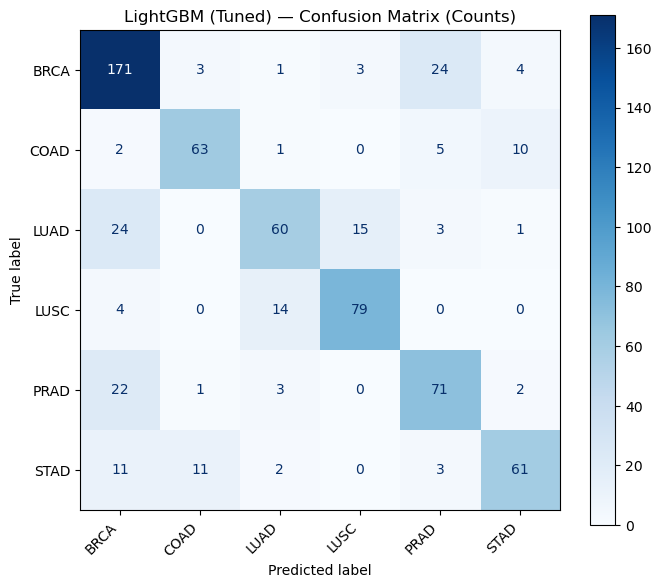

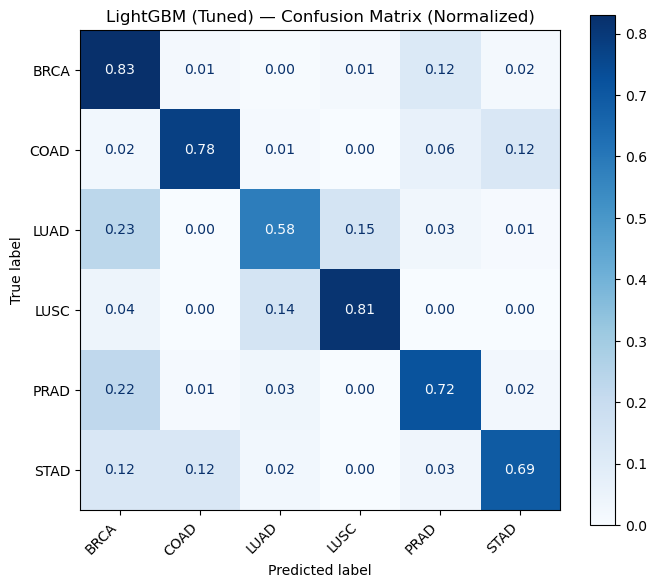

In [200]:
plot_cm(y_test_enc, y_pred_lgb_enc, "LightGBM (Tuned) — Confusion Matrix (Counts)", normalize=None)
plot_cm(y_test_enc, y_pred_lgb_enc, "LightGBM (Tuned) — Confusion Matrix (Normalized)", normalize="true")


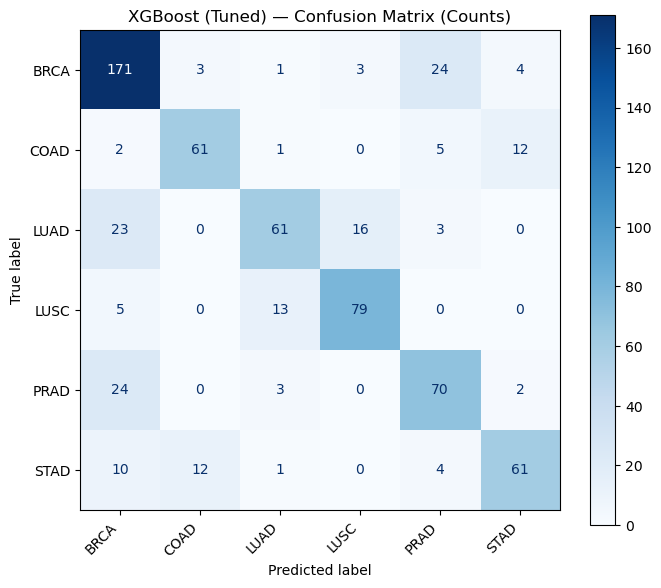

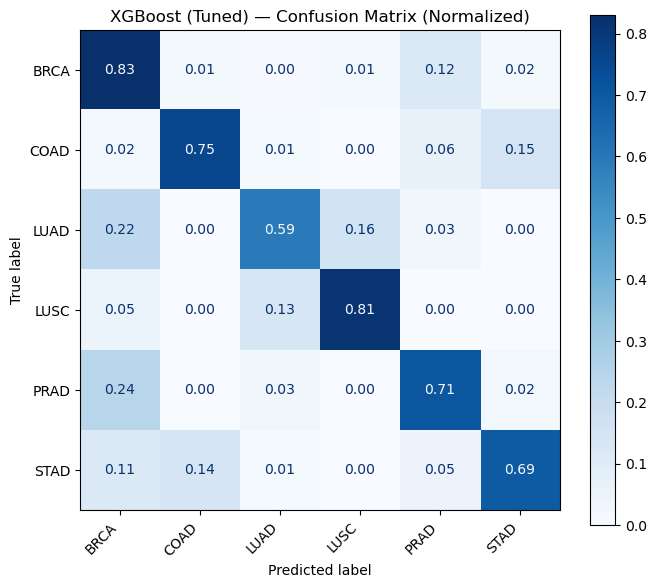

In [201]:
plot_cm(y_test_enc, y_pred_xgb_enc, "XGBoost (Tuned) — Confusion Matrix (Counts)", normalize=None)
plot_cm(y_test_enc, y_pred_xgb_enc, "XGBoost (Tuned) — Confusion Matrix (Normalized)", normalize="true")


**Hybrid Approach**

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_96_lgb,     # f0, f1, ... features
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [181]:
lgb_proba_train = lgbm_tuned.predict_proba(X_train)
lgb_proba_test  = lgbm_tuned.predict_proba(X_test)


[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


In [183]:
xgb_proba_train = xgb.predict_proba(X_train)
xgb_proba_test  = xgb.predict_proba(X_test)


In [184]:
import numpy as np

X_meta_train = np.hstack([lgb_proba_train, xgb_proba_train])
X_meta_test  = np.hstack([lgb_proba_test,  xgb_proba_test])

print(X_meta_train.shape, X_meta_test.shape)


(2692, 12) (674, 12)


In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

meta = LogisticRegression(
    max_iter=1000,
    multi_class="multinomial",
    solver="lbfgs"
)

meta.fit(X_meta_train, y_train)

y_pred_meta = meta.predict(X_meta_test)

print(classification_report(y_test, y_pred_meta))


              precision    recall  f1-score   support

        BRCA       0.73      0.83      0.78       206
        COAD       0.81      0.77      0.78        81
        LUAD       0.74      0.56      0.64       103
        LUSC       0.79      0.81      0.80        97
        PRAD       0.68      0.72      0.70        99
        STAD       0.77      0.69      0.73        88

    accuracy                           0.74       674
   macro avg       0.75      0.73      0.74       674
weighted avg       0.75      0.74      0.74       674



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [202]:
import matplotlib.pyplot as plt
import seaborn as sns


In [203]:
# Count samples per cancer type
class_counts = y.value_counts().sort_index()

print(class_counts)


type
BRCA    1026
COAD     406
LUAD     516
LUSC     485
PRAD     495
STAD     438
Name: count, dtype: int64


/var/folders/c1/4cg3s85x1ss50sz5xt5q6s4c0000gn/T/ipykernel_41462/1884724589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


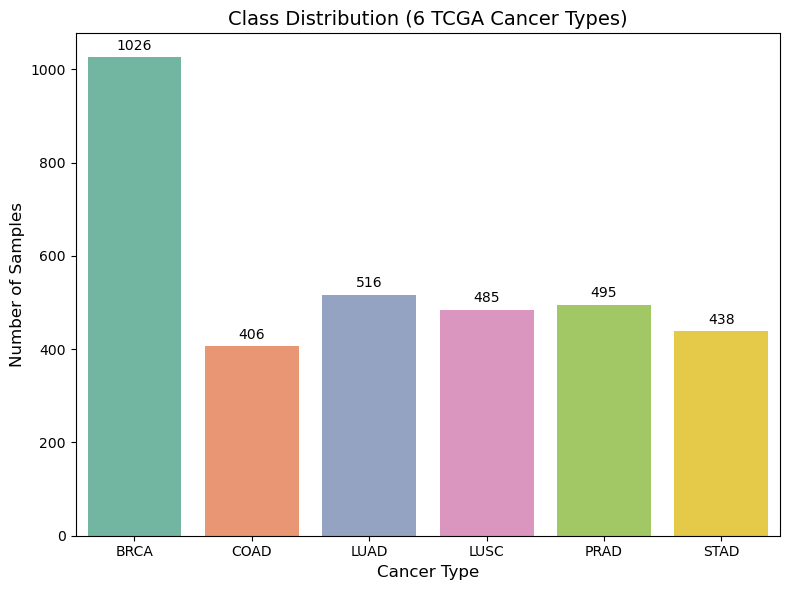

In [204]:
plt.figure(figsize=(8, 6))

sns.barplot(
    x=class_counts.index,
    y=class_counts.values,
    palette="Set2"
)

plt.title("Class Distribution (6 TCGA Cancer Types)", fontsize=14)
plt.xlabel("Cancer Type", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)

# Add value labels on bars
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 10, str(v), ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


In [206]:
class_percentages = y.value_counts(normalize=True).sort_index() * 100
class_percentages = class_percentages.round(2)

print(class_percentages)


type
BRCA    30.48
COAD    12.06
LUAD    15.33
LUSC    14.41
PRAD    14.71
STAD    13.01
Name: proportion, dtype: float64


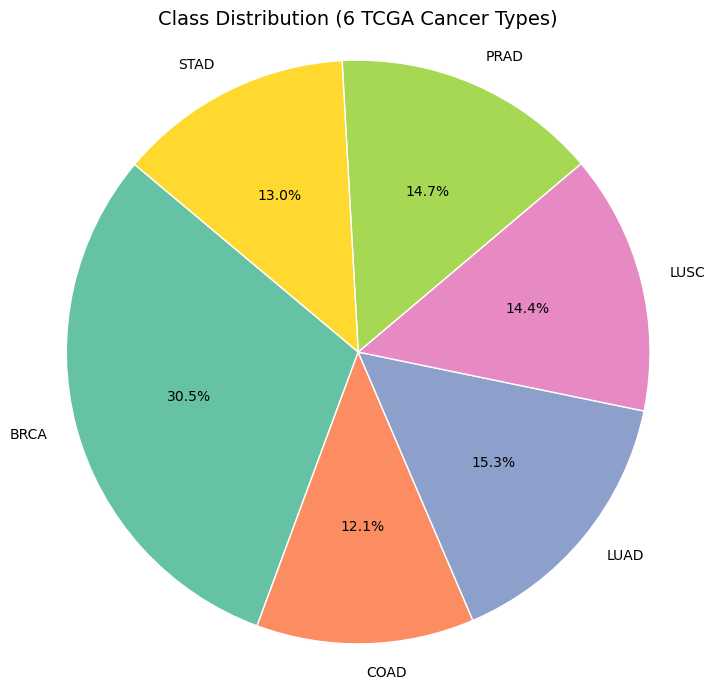

In [207]:
plt.figure(figsize=(7, 7))

plt.pie(
    class_percentages.values,
    labels=class_percentages.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Set2.colors,
    wedgeprops={"edgecolor": "white"}
)

plt.title("Class Distribution (6 TCGA Cancer Types)", fontsize=14)
plt.axis("equal")  # makes the pie a circle

plt.tight_layout()
plt.show()


In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine features + labels
plot_df = pd.DataFrame({
    "Cancer Type": y,
    "Total Mutations": X["total_mutations"]
})


/var/folders/c1/4cg3s85x1ss50sz5xt5q6s4c0000gn/T/ipykernel_41462/4120973174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


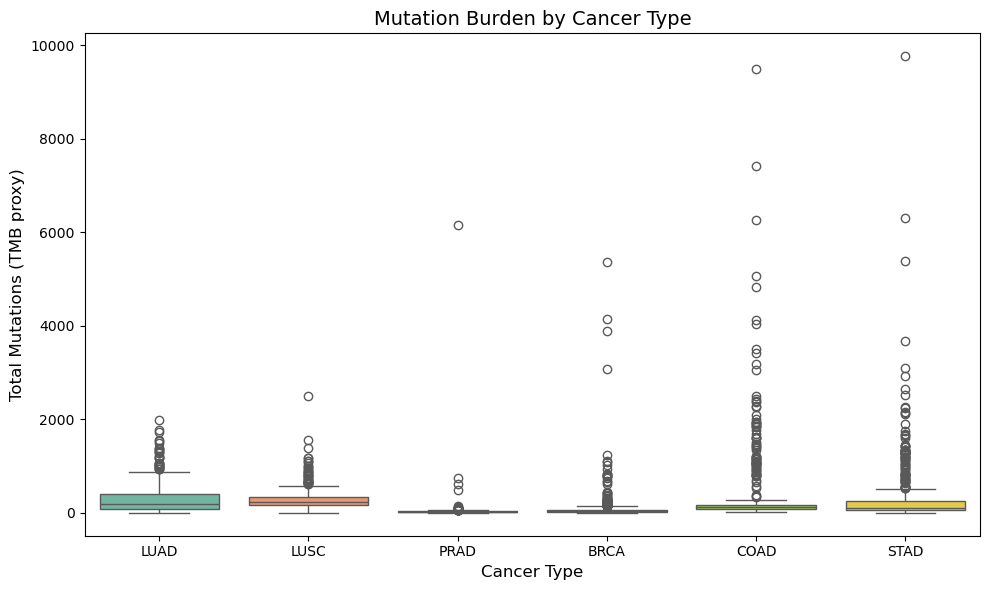

In [209]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=plot_df,
    x="Cancer Type",
    y="Total Mutations",
    palette="Set2",
    showfliers=True
)

plt.title("Mutation Burden by Cancer Type", fontsize=14)
plt.xlabel("Cancer Type", fontsize=12)
plt.ylabel("Total Mutations (TMB proxy)", fontsize=12)

plt.tight_layout()
plt.show()


/var/folders/c1/4cg3s85x1ss50sz5xt5q6s4c0000gn/T/ipykernel_41462/4209587018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


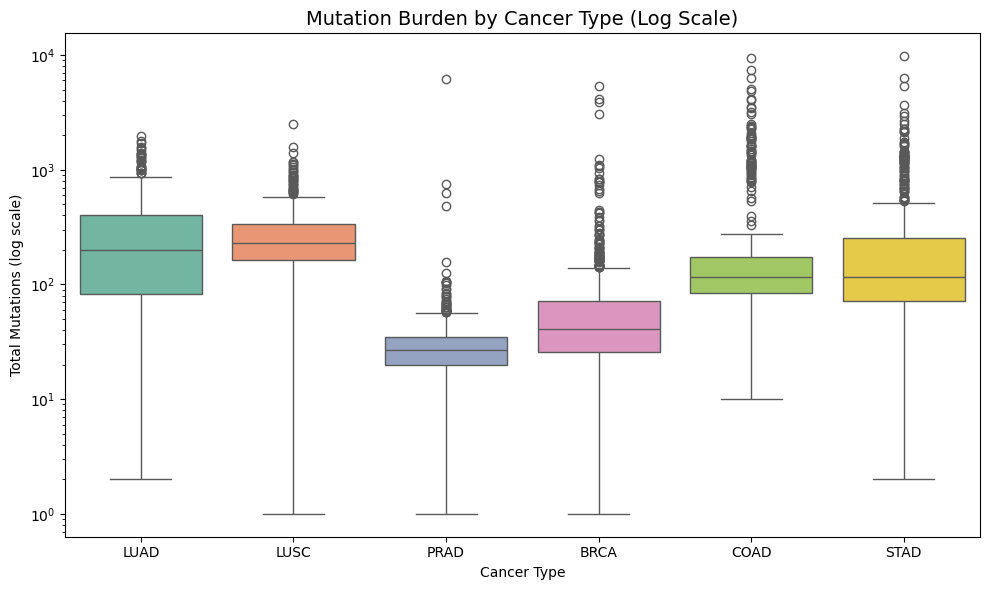

In [210]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=plot_df,
    x="Cancer Type",
    y="Total Mutations",
    palette="Set2",
    showfliers=True
)

plt.yscale("log")
plt.title("Mutation Burden by Cancer Type (Log Scale)", fontsize=14)
plt.xlabel("Cancer Type")
plt.ylabel("Total Mutations (log scale)")

plt.tight_layout()
plt.show()


In [214]:
# Count mutations per gene per cancer type
gene_cancer_counts = (
    mut_df
    .groupby(["type", "Hugo_Symbol"])
    .size()
    .reset_index(name="count")
)

# Select top 15 most mutated genes overall
top_genes = (
    gene_cancer_counts
    .groupby("Hugo_Symbol")["count"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

# Pivot to matrix
heatmap_df = (
    gene_cancer_counts[gene_cancer_counts["Hugo_Symbol"].isin(top_genes)]
    .pivot(index="Hugo_Symbol", columns="type", values="count")
    .fillna(0)
)

heatmap_df


type,BRCA,COAD,LUAD,LUSC,PRAD,STAD
Hugo_Symbol,,,,,,
APC,24,506,27,32,12,71
CSMD3,53,134,401,355,23,154
FAT4,27,199,106,76,15,170
FLG,84,99,229,118,10,157
LRP1B,52,141,321,282,25,193
MUC16,161,285,420,352,42,286
PCLO,47,116,139,126,18,142
PIK3CA,415,166,35,64,13,96
RYR2,86,172,381,303,23,114


In [213]:
mut_df = pd.read_parquet("data_processed/mutations_6_cancer_types.parquet")


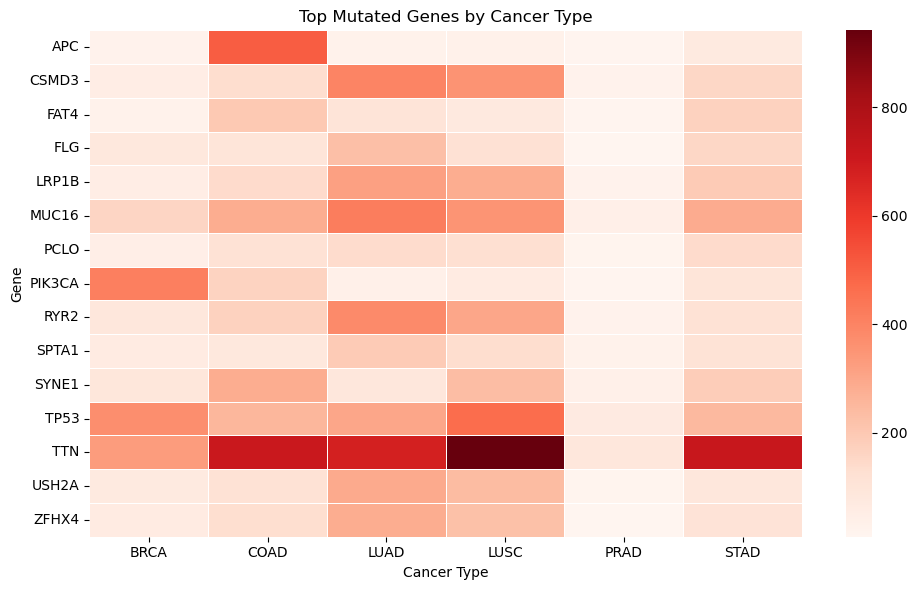

In [215]:
gene_cancer_counts = (
    mut_df
    .groupby(["type", "Hugo_Symbol"])
    .size()
    .reset_index(name="count")
)

top_genes = (
    gene_cancer_counts
    .groupby("Hugo_Symbol")["count"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)

heatmap_df = (
    gene_cancer_counts[gene_cancer_counts["Hugo_Symbol"].isin(top_genes)]
    .pivot(index="Hugo_Symbol", columns="type", values="count")
    .fillna(0)
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, cmap="Reds", linewidths=0.5)
plt.title("Top Mutated Genes by Cancer Type")
plt.xlabel("Cancer Type")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()


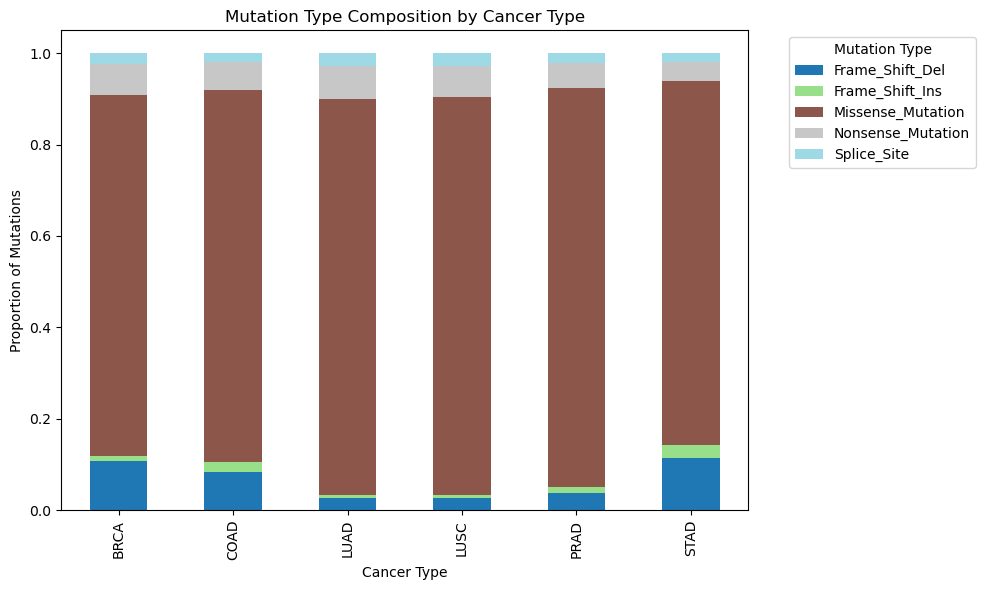

In [216]:
top_mut_types = [
    "Missense_Mutation",
    "Nonsense_Mutation",
    "Frame_Shift_Del",
    "Frame_Shift_Ins",
    "Splice_Site"
]

mut_type_counts = (
    mut_df[mut_df["Variant_Classification"].isin(top_mut_types)]
    .groupby(["type", "Variant_Classification"])
    .size()
    .unstack(fill_value=0)
)

mut_type_frac = mut_type_counts.div(mut_type_counts.sum(axis=1), axis=0)

mut_type_frac.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="tab20"
)

plt.title("Mutation Type Composition by Cancer Type")
plt.xlabel("Cancer Type")
plt.ylabel("Proportion of Mutations")
plt.legend(title="Mutation Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [217]:
import pandas as pd

# Extract importance by gain
importance = pd.Series(
    lgbm_tuned.booster_.feature_importance(importance_type="gain"),
    index=X_96_lgb.columns
)

# Sort descending and select top 20
top20_importance = importance.sort_values(ascending=False).head(20)

top20_importance


f5      7896.222986
f0      7268.013301
f93     6523.640762
f12     6183.902088
f101    4799.664196
f146    3406.996208
f97     3059.397115
f65     2432.804492
f44     2402.533727
f103    2172.882392
f32     2167.423262
f63     2087.703328
f64     1794.333952
f90     1390.405934
f61     1338.295665
f106    1265.198851
f104    1117.083652
f150    1088.440988
f72     1087.748777
f105    1046.354366
dtype: float64

In [218]:
# Map back to original biological feature names
top20_importance_named = top20_importance.rename(index=inverse_feature_map)

top20_importance_named


Missense_Mutation    7896.222986
total_mutations      7268.013301
A[C>T]G              6523.640762
APC                  6183.902088
G[C>T]G              4799.664196
C[T>G]T              3406.996208
C[C>T]G              3059.397115
C[C>A]G              2432.804492
PIK3CA               2402.533727
T[C>T]A              2172.882392
KRAS                 2167.423262
C[C>A]A              2087.703328
C[C>A]C              1794.333952
T[C>G]T              1390.405934
A[C>A]G              1338.295665
T[C>T]T              1265.198851
T[C>T]C              1117.083652
G[T>G]T              1088.440988
T[C>A]C              1087.748777
T[C>T]G              1046.354366
dtype: float64

/var/folders/c1/4cg3s85x1ss50sz5xt5q6s4c0000gn/T/ipykernel_41462/3049105967.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


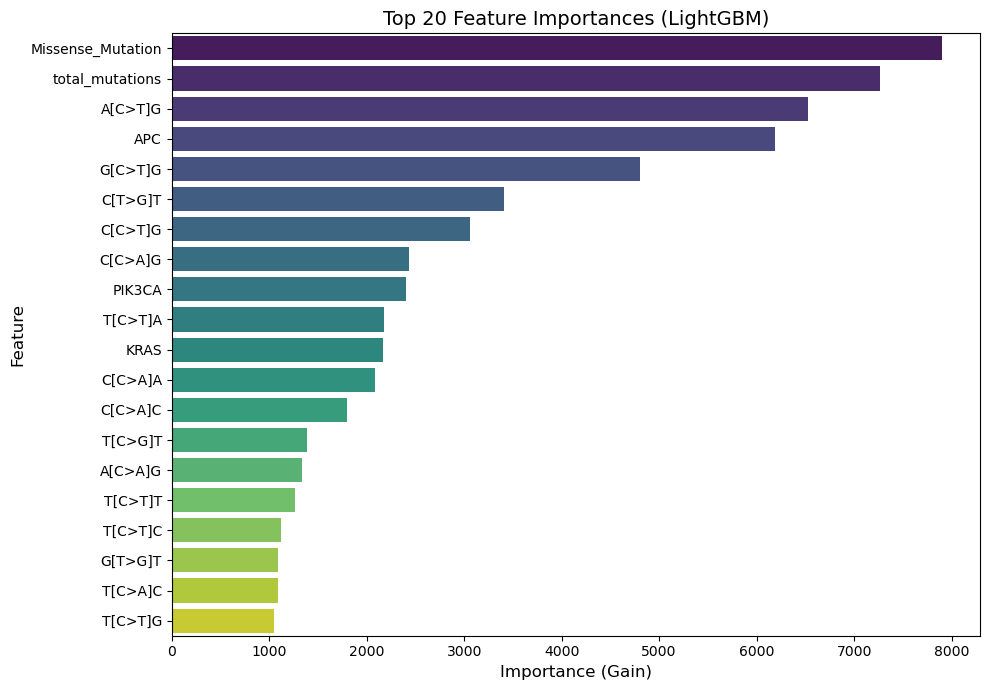

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

sns.barplot(
    x=top20_importance_named.values,
    y=top20_importance_named.index,
    palette="viridis"
)

plt.title("Top 20 Feature Importances (LightGBM)", fontsize=14)
plt.xlabel("Importance (Gain)", fontsize=12)
plt.ylabel("Feature", fontsize=12)

plt.tight_layout()
plt.show()


In [220]:
import pandas as pd

# Extract feature importance by gain
xgb_importance = pd.Series(
    xgb.get_booster().get_score(importance_type="gain")
)

# Convert keys (f0, f1, ...) to float importance
xgb_importance = xgb_importance.sort_values(ascending=False).head(20)

xgb_importance


f12     10.134903
f5       4.467379
f44      3.946306
f0       3.280046
f32      2.711468
f65      2.202556
f146     2.105871
f93      1.956353
f3       1.777854
f63      1.747554
f18      1.738833
f61      1.703033
f64      1.452254
f101     1.329916
f2       1.290507
f150     1.207589
f54      1.187890
f90      1.139670
f69      1.074653
f31      0.990957
dtype: float64

In [221]:
# Map back to original biological names
xgb_importance_named = xgb_importance.rename(index=inverse_feature_map)

xgb_importance_named


APC                  10.134903
Missense_Mutation     4.467379
PIK3CA                3.946306
total_mutations       3.280046
KRAS                  2.711468
C[C>A]G               2.202556
C[T>G]T               2.105871
A[C>T]G               1.956353
In_Frame_Del          1.777854
C[C>A]A               1.747554
CSMD3                 1.738833
A[C>A]G               1.703033
C[C>A]C               1.452254
G[C>T]G               1.329916
Frame_Shift_Ins       1.290507
G[T>G]T               1.207589
TP53                  1.187890
T[C>G]T               1.139670
G[C>A]G               1.074653
KMT2D                 0.990957
dtype: float64

/var/folders/c1/4cg3s85x1ss50sz5xt5q6s4c0000gn/T/ipykernel_41462/1699635543.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


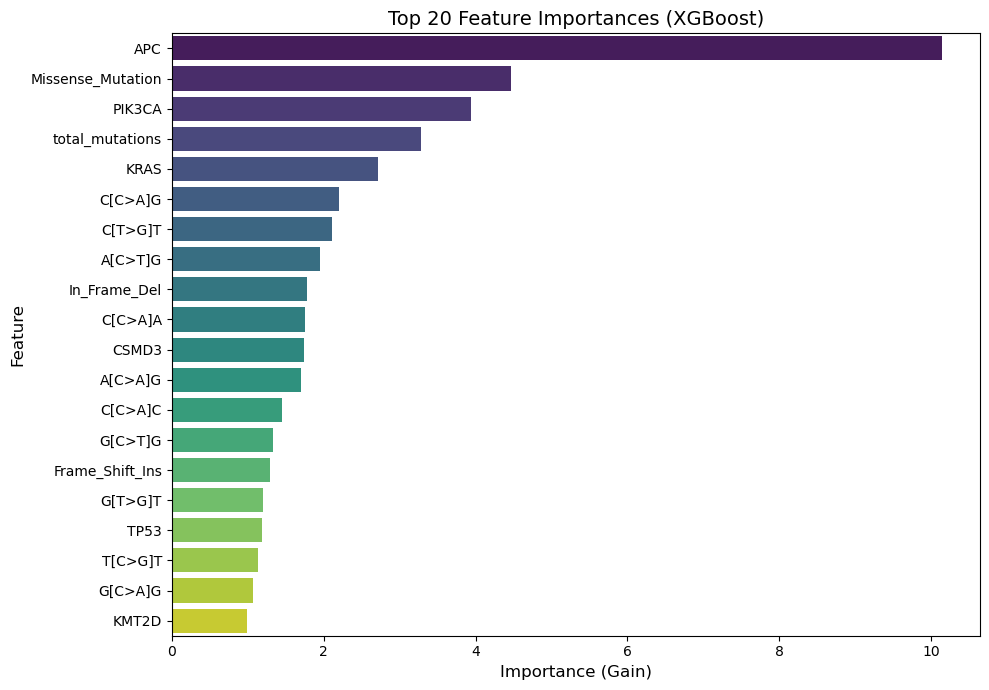

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

sns.barplot(
    x=xgb_importance_named.values,
    y=xgb_importance_named.index,
    palette="viridis"
)

plt.title("Top 20 Feature Importances (XGBoost)", fontsize=14)
plt.xlabel("Importance (Gain)", fontsize=12)
plt.ylabel("Feature", fontsize=12)

plt.tight_layout()
plt.show()


In [223]:
import pandas as pd

# Load cancer labels
y_df = pd.read_csv("data_processed/y_cancer_labels.csv")

# If it has an index column, keep only the label column
y_df.head()


,Tumor_Sample_Barcode,type
0,TCGA-05-4244-01A-01D-1105-08,LUAD
1,TCGA-05-4249-01A-01D-1105-08,LUAD
2,TCGA-05-4250-01A-01D-1105-08,LUAD
3,TCGA-05-4382-01A-01D-1931-08,LUAD
4,TCGA-05-4384-01A-01D-1753-08,LUAD


In [224]:
y = y_df["type"]

In [225]:
# Count samples per cancer type
summary = (
    y.value_counts()
     .rename("Number of Samples")
     .to_frame()
)

# Add percentage column
summary["Percent of Total (%)"] = (summary["Number of Samples"] / summary["Number of Samples"].sum() * 100).round(2)

# Reset index for table format
summary = summary.reset_index().rename(columns={"index": "Cancer Type"})

summary


,type,Number of Samples,Percent of Total (%)
0,BRCA,1026,30.48
1,LUAD,516,15.33
2,PRAD,495,14.71
3,LUSC,485,14.41
4,STAD,438,13.01
5,COAD,406,12.06


In [226]:
summary.to_csv("results/tables/dataset_summary.csv", index=False)

print("Saved: results/tables/dataset_summary.csv")


Saved: results/tables/dataset_summary.csv


In [227]:
import pandas as pd

feature_groups = pd.DataFrame({
    "Feature Group": [
        "Basic mutation burden & mutation type composition",
        "Top-50 gene mutation counts",
        "96-context mutation features",
        "Total combined features"
    ],
    "Number of Features": [
        9,
        50,
        96,
        9 + 50 + 96
    ]
})

feature_groups


,Feature Group,Number of Features
0,Basic mutation burden & mutation type composition,9
1,Top-50 gene mutation counts,50
2,96-context mutation features,96
3,Total combined features,155


In [228]:
feature_groups.to_csv(
    "results/tables/feature_groups_summary.csv",
    index=False
)

print("Saved: results/tables/feature_groups_summary.csv")


Saved: results/tables/feature_groups_summary.csv


In [237]:
model_rows = [
    {"model": "Random Forest (basic features)", "accuracy": 0.46, "macro_f1": 0.43, "weighted_f1": 0.45},
    {"model": "Random Forest (+Top-50 genes)", "accuracy": 0.62, "macro_f1": 0.60, "weighted_f1": 0.61},
    {"model": "Random Forest (+COSMIC)", "accuracy": 0.61, "macro_f1": 0.60, "weighted_f1": 0.61},
    {"model": "XGBoost tuned (final features)", "accuracy": 0.75, "macro_f1": 0.74, "weighted_f1": 0.74},
    {"model": "LightGBM tuned (final features) — FINAL", "accuracy": 0.75, "macro_f1": 0.74, "weighted_f1": 0.75},
    {"model": "Stacked ensemble (LGBM+XGB)", "accuracy": 0.74, "macro_f1": 0.74, "weighted_f1": 0.74},
]

model_cmp = pd.DataFrame(model_rows)
model_cmp.to_csv("results/tables/model_comparison.csv", index=False)
model_cmp


,model,accuracy,macro_f1,weighted_f1
0,Random Forest (basic features),0.46,0.43,0.45
1,Random Forest (+Top-50 genes),0.62,0.60,0.61
2,Random Forest (+COSMIC),0.61,0.60,0.61
3,XGBoost tuned (final features),0.75,0.74,0.74
4,LightGBM tuned (final features) — FINAL,0.75,0.74,0.75
5,Stacked ensemble (LGBM+XGB),0.74,0.74,0.74
